In [1]:
#pip install tabula-py

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import math
from datetime import datetime
from datetime import date
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
import tabula

In [3]:
df_inventory = pd.read_csv('inventory.csv')
df_products = pd.read_csv('products.csv')
df_sales = pd.read_csv('sales.csv')
df_stores = pd.read_csv('stores.csv')

In [4]:
# Let's take a look at "inventory" dataset
df_inventory.head(10)

Store_ID  Product_ID  Stock_On_Hand
0         1           1             27
1         1           2              0
2         1           3             32
3         1           4              6
4         1           5              0
5         1           6             79
6         1           7              5
7         1           8             63
8         1           9             12
9         1          10             22

In [5]:
# Let's take a look at "products" dataset

df_products.head(10)

Product_ID      Product_Name   Product_Category Product_Cost Product_Price
0           1     Action Figure               Toys       $9.99        $15.99 
1           2    Animal Figures               Toys       $9.99        $12.99 
2           3   Barrel O' Slime       Art & Crafts       $1.99         $3.99 
3           4  Chutes & Ladders              Games       $9.99        $12.99 
4           5  Classic Dominoes              Games       $7.99         $9.99 
5           6         Colorbuds        Electronics       $6.99        $14.99 
6           7          Dart Gun  Sports & Outdoors      $11.99        $15.99 
7           8     Deck Of Cards              Games       $3.99         $6.99 
8           9          Dino Egg               Toys       $9.99        $10.99 
9          10  Dinosaur Figures               Toys      $10.99        $14.99

In [6]:
# Let's take a look at "sales" dataset
df_sales.head(10)

Sale_ID        Date  Store_ID  Product_ID  Units
0        1  2017-01-01        24           4      1
1        2  2017-01-01        28           1      1
2        3  2017-01-01         6           8      1
3        4  2017-01-01        48           7      1
4        5  2017-01-01        44          18      1
5        6  2017-01-01         1          31      1
6        7  2017-01-01        40           7      1
7        8  2017-01-01        19           2      1
8        9  2017-01-01        38          21      1
9       10  2017-01-01        21           8      1

In [7]:
# Let's take a look at "stores" dataset
df_stores.head(10)

Store_ID                     Store_Name        Store_City Store_Location  \
0         1       Maven Toys Guadalajara 1       Guadalajara    Residential   
1         2         Maven Toys Monterrey 1         Monterrey    Residential   
2         3       Maven Toys Guadalajara 2       Guadalajara     Commercial   
3         4          Maven Toys Saltillo 1          Saltillo       Downtown   
4         5            Maven Toys La Paz 1            La Paz       Downtown   
5         6          Maven Toys Mexicali 1          Mexicali     Commercial   
6         7         Maven Toys Monterrey 2         Monterrey       Downtown   
7         8           Maven Toys Pachuca 1           Pachuca       Downtown   
8         9  Maven Toys Ciudad de Mexico 1  Cuidad de Mexico       Downtown   
9        10          Maven Toys Campeche 1          Campeche       Downtown   

  Store_Open_Date  
0      1992-09-18  
1      1995-04-27  
2      1999-12-27  
3      2000-01-01  
4      2001-05-31  
5      2003-12-13  
6      2003-12-25  
7      2004-10-14  
8      2004-10-15  
9      2005-01-14

In [8]:
# In the column 'Store_Location', it is written 'Cuidad de Mexico' instead of 'Ciudad de Mexico'
# Let's correct the mistake
df_stores['Store_City'].replace('Cuidad de Mexico', 'Ciudad de Mexico', inplace = True)

In [9]:
# Let's verify that change is ok
df_stores.head(10)

Store_ID                     Store_Name        Store_City Store_Location  \
0         1       Maven Toys Guadalajara 1       Guadalajara    Residential   
1         2         Maven Toys Monterrey 1         Monterrey    Residential   
2         3       Maven Toys Guadalajara 2       Guadalajara     Commercial   
3         4          Maven Toys Saltillo 1          Saltillo       Downtown   
4         5            Maven Toys La Paz 1            La Paz       Downtown   
5         6          Maven Toys Mexicali 1          Mexicali     Commercial   
6         7         Maven Toys Monterrey 2         Monterrey       Downtown   
7         8           Maven Toys Pachuca 1           Pachuca       Downtown   
8         9  Maven Toys Ciudad de Mexico 1  Ciudad de Mexico       Downtown   
9        10          Maven Toys Campeche 1          Campeche       Downtown   

  Store_Open_Date  
0      1992-09-18  
1      1995-04-27  
2      1999-12-27  
3      2000-01-01  
4      2001-05-31  
5      2003-12-13  
6      2003-12-25  
7      2004-10-14  
8      2004-10-15  
9      2005-01-14

## Let's check at the column type for each dataset

In [10]:
df_inventory.dtypes

Store_ID         int64
Product_ID       int64
Stock_On_Hand    int64
dtype: object

In [11]:
df_products.dtypes

Product_ID           int64
Product_Name        object
Product_Category    object
Product_Cost        object
Product_Price       object
dtype: object

In [12]:
df_sales.dtypes

Sale_ID        int64
Date          object
Store_ID       int64
Product_ID     int64
Units          int64
dtype: object

In [13]:
df_stores.dtypes

Store_ID            int64
Store_Name         object
Store_City         object
Store_Location     object
Store_Open_Date    object
dtype: object

## Convert from object type to date type for the columns 'Date' and 'Store_Open_Date' from the tables df_sales and df_stores

In [14]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

In [15]:
df_stores['Store_Open_Date'] = pd.to_datetime(df_stores['Store_Open_Date'])

In [16]:
# Let's check again the column types for "sales" dataset
df_sales.dtypes

Sale_ID                int64
Date          datetime64[ns]
Store_ID               int64
Product_ID             int64
Units                  int64
dtype: object

In [17]:
# Let's check again the column types for "stores" dataset
df_stores.dtypes

Store_ID                    int64
Store_Name                 object
Store_City                 object
Store_Location             object
Store_Open_Date    datetime64[ns]
dtype: object

## Erase the '$' sign and convert from object to float for 'Product_Cost' and 'Product_Price'

In [18]:
df_products['Product_Cost'] = df_products['Product_Cost'].str.replace('$', '')

In [19]:
df_products['Product_Price'] = df_products['Product_Price'].str.replace('$', '')

In [20]:
df_products.head(5)

Product_ID      Product_Name Product_Category Product_Cost Product_Price
0           1     Action Figure             Toys        9.99         15.99 
1           2    Animal Figures             Toys        9.99         12.99 
2           3   Barrel O' Slime     Art & Crafts        1.99          3.99 
3           4  Chutes & Ladders            Games        9.99         12.99 
4           5  Classic Dominoes            Games        7.99          9.99

In [21]:
# Convert from object to float

df_products['Product_Cost'] =df_products['Product_Cost'].astype(float)
df_products['Product_Price'] = df_products['Product_Price'].astype(float)

In [22]:
df_products.dtypes

Product_ID            int64
Product_Name         object
Product_Category     object
Product_Cost        float64
Product_Price       float64
dtype: object

In [23]:
df_products.head(10)

Product_ID      Product_Name   Product_Category  Product_Cost  \
0           1     Action Figure               Toys          9.99   
1           2    Animal Figures               Toys          9.99   
2           3   Barrel O' Slime       Art & Crafts          1.99   
3           4  Chutes & Ladders              Games          9.99   
4           5  Classic Dominoes              Games          7.99   
5           6         Colorbuds        Electronics          6.99   
6           7          Dart Gun  Sports & Outdoors         11.99   
7           8     Deck Of Cards              Games          3.99   
8           9          Dino Egg               Toys          9.99   
9          10  Dinosaur Figures               Toys         10.99   

   Product_Price  
0          15.99  
1          12.99  
2           3.99  
3          12.99  
4           9.99  
5          14.99  
6          15.99  
7           6.99  
8          10.99  
9          14.99

# Let's perform EDA on the different datasets

In [24]:
# Let's check for the store selling the most and which product
df_most_selling_product_store = df_sales.groupby(['Store_ID','Product_ID'])['Units'].sum().to_frame().reset_index()
df_most_selling_product_store.sort_values(by = 'Units', ascending = False, inplace = True)
df_most_selling_product_store

Store_ID  Product_ID  Units
983         31           6   5627
1153        36          14   5120
167          6           6   4914
1522        47          31   4812
1350        42           6   4774
...        ...         ...    ...
653         20          26     13
885         27          29     13
1497        47           4      8
190          6          29      6
1512        47          20      5

[1631 rows x 3 columns]

In [25]:
# Let's merge "df_stores" and "df_most_selling_product_store"
df_selling_product = pd.merge(df_stores, df_most_selling_product_store, on = 'Store_ID')
df_selling_product

Store_ID                Store_Name   Store_City Store_Location  \
0            1  Maven Toys Guadalajara 1  Guadalajara    Residential   
1            1  Maven Toys Guadalajara 1  Guadalajara    Residential   
2            1  Maven Toys Guadalajara 1  Guadalajara    Residential   
3            1  Maven Toys Guadalajara 1  Guadalajara    Residential   
4            1  Maven Toys Guadalajara 1  Guadalajara    Residential   
...        ...                       ...          ...            ...   
1626        50   Maven Toys Guanajuato 3   Guanajuato    Residential   
1627        50   Maven Toys Guanajuato 3   Guanajuato    Residential   
1628        50   Maven Toys Guanajuato 3   Guanajuato    Residential   
1629        50   Maven Toys Guanajuato 3   Guanajuato    Residential   
1630        50   Maven Toys Guanajuato 3   Guanajuato    Residential   

     Store_Open_Date  Product_ID  Units  
0         1992-09-18           8   2124  
1         1992-09-18          25   1771  
2         1992-09-18           3   1668  
3         1992-09-18          19   1536  
4         1992-09-18           1   1262  
...              ...         ...    ...  
1626      2016-05-18          35    115  
1627      2016-05-18          20    114  
1628      2016-05-18          33    110  
1629      2016-05-18          28     91  
1630      2016-05-18          26     67  

[1631 rows x 7 columns]

In [26]:
# Let's merge "df_products" and "df_selling_product"
df_selling_profits = pd.merge(df_products, df_selling_product, on = 'Product_ID')
df_selling_profits

Product_ID   Product_Name Product_Category  Product_Cost  Product_Price  \
0              1  Action Figure             Toys          9.99          15.99   
1              1  Action Figure             Toys          9.99          15.99   
2              1  Action Figure             Toys          9.99          15.99   
3              1  Action Figure             Toys          9.99          15.99   
4              1  Action Figure             Toys          9.99          15.99   
...          ...            ...              ...           ...            ...   
1626          35  Uno Card Game            Games          3.99           7.99   
1627          35  Uno Card Game            Games          3.99           7.99   
1628          35  Uno Card Game            Games          3.99           7.99   
1629          35  Uno Card Game            Games          3.99           7.99   
1630          35  Uno Card Game            Games          3.99           7.99   

      Store_ID                Store_Name   Store_City Store_Location  \
0            1  Maven Toys Guadalajara 1  Guadalajara    Residential   
1            2    Maven Toys Monterrey 1    Monterrey    Residential   
2            3  Maven Toys Guadalajara 2  Guadalajara     Commercial   
3            4     Maven Toys Saltillo 1     Saltillo       Downtown   
4            5       Maven Toys La Paz 1       La Paz       Downtown   
...        ...                       ...          ...            ...   
1626        41   Maven Toys Hermosillo 2   Hermosillo       Downtown   
1627        42   Maven Toys Hermosillo 3   Hermosillo     Commercial   
1628        48     Maven Toys Saltillo 2     Saltillo     Commercial   
1629        49     Maven Toys Culiacan 1     Culiacan       Downtown   
1630        50   Maven Toys Guanajuato 3   Guanajuato    Residential   

     Store_Open_Date  Units  
0         1992-09-18   1262  
1         1995-04-27    746  
2         1999-12-27   1158  
3         2000-01-01   1027  
4         2001-05-31    876  
...              ...    ...  
1626      2014-06-01    202  
1627      2014-06-27     72  
1628      2016-03-23    122  
1629      2016-05-10    122  
1630      2016-05-18    115  

[1631 rows x 11 columns]

In [27]:
# Let's compute the profits for each toy for each store location
df_selling_profits["Profits"] = (df_selling_profits["Product_Price"] - df_selling_profits["Product_Cost"]) * df_selling_profits["Units"]

df_selling_profits

Product_ID   Product_Name Product_Category  Product_Cost  Product_Price  \
0              1  Action Figure             Toys          9.99          15.99   
1              1  Action Figure             Toys          9.99          15.99   
2              1  Action Figure             Toys          9.99          15.99   
3              1  Action Figure             Toys          9.99          15.99   
4              1  Action Figure             Toys          9.99          15.99   
...          ...            ...              ...           ...            ...   
1626          35  Uno Card Game            Games          3.99           7.99   
1627          35  Uno Card Game            Games          3.99           7.99   
1628          35  Uno Card Game            Games          3.99           7.99   
1629          35  Uno Card Game            Games          3.99           7.99   
1630          35  Uno Card Game            Games          3.99           7.99   

      Store_ID                Store_Name   Store_City Store_Location  \
0            1  Maven Toys Guadalajara 1  Guadalajara    Residential   
1            2    Maven Toys Monterrey 1    Monterrey    Residential   
2            3  Maven Toys Guadalajara 2  Guadalajara     Commercial   
3            4     Maven Toys Saltillo 1     Saltillo       Downtown   
4            5       Maven Toys La Paz 1       La Paz       Downtown   
...        ...                       ...          ...            ...   
1626        41   Maven Toys Hermosillo 2   Hermosillo       Downtown   
1627        42   Maven Toys Hermosillo 3   Hermosillo     Commercial   
1628        48     Maven Toys Saltillo 2     Saltillo     Commercial   
1629        49     Maven Toys Culiacan 1     Culiacan       Downtown   
1630        50   Maven Toys Guanajuato 3   Guanajuato    Residential   

     Store_Open_Date  Units  Profits  
0         1992-09-18   1262   7572.0  
1         1995-04-27    746   4476.0  
2         1999-12-27   1158   6948.0  
3         2000-01-01   1027   6162.0  
4         2001-05-31    876   5256.0  
...              ...    ...      ...  
1626      2014-06-01    202    808.0  
1627      2014-06-27     72    288.0  
1628      2016-03-23    122    488.0  
1629      2016-05-10    122    488.0  
1630      2016-05-18    115    460.0  

[1631 rows x 12 columns]

In [28]:
# Let's check for the top selling stores

selling_stores = df_selling_profits.groupby(["Store_Name", "Store_City", "Store_Location"])["Profits"].sum().reset_index()
selling_stores.sort_values('Profits', ascending = False, inplace = True)
top_selling_stores = selling_stores.head(10)
top_selling_stores

Store_Name        Store_City Store_Location   Profits
9   Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport  169856.0
17       Maven Toys Guadalajara 3       Guadalajara        Airport  121571.0
8   Maven Toys Ciudad de Mexico 1  Ciudad de Mexico       Downtown  111296.0
30         Maven Toys Monterrey 2         Monterrey       Downtown  106783.0
43            Maven Toys Toluca 1            Toluca       Downtown  104612.0
18       Maven Toys Guadalajara 4       Guadalajara       Downtown  102178.0
24        Maven Toys Hermosillo 3        Hermosillo     Commercial   98825.0
27          Maven Toys Mexicali 1          Mexicali     Commercial   97206.0
39          Maven Toys Saltillo 1          Saltillo       Downtown   94252.0
10  Maven Toys Ciudad de Mexico 3  Ciudad de Mexico    Residential   94021.0

## Let's plot the top selling stores in a bar chart

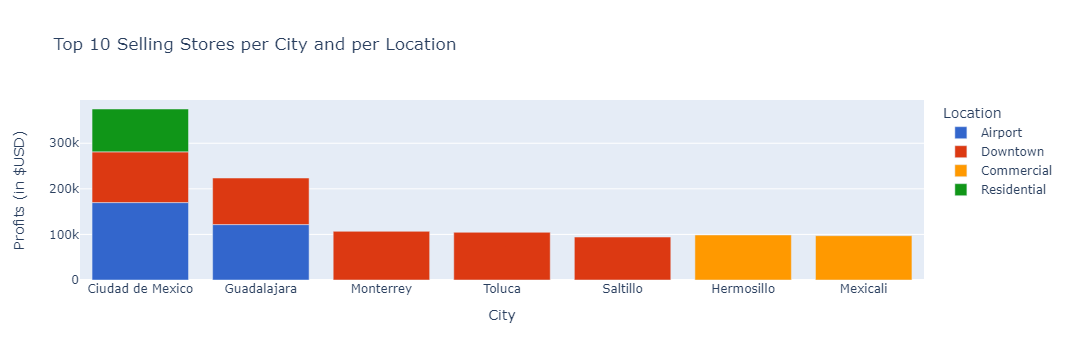

In [29]:
# map emotions to a color
c = dict(zip(top_selling_stores['Store_Location'].unique(), px.colors.qualitative.G10))

best_10_stores = px.bar(top_selling_stores, x = 'Store_City', y = 'Profits', color = 'Store_Location',
                    labels = {
                        'Store_City': 'City',
                        'Profits': 'Profits (in $USD)',
                        'Store_Location': 'Location'
                    },
                     title = 'Top 10 Selling Stores per City and per Location',
                    color_discrete_map=c
                     )

best_10_stores.show()

## Let's create a map showing the top 10 selling stores

In [36]:
# Let's create a map with markers indicating were are the top selling stores

# Create a map object centered at Mexico
mexico_map = folium.Map(location = [23.624812500000004, -102.57867049999999], zoom_start = 5)
mexico_map

# Let's create a dataset with the coordinates of the cities mentioned in "top_selling_stores" dataset
locations = {'Store_City': ['Ciudad de Mexico', 'Guadalajara', 'Ciudad de Mexico', 'Monterrey', 'Toluca', 'Guadalajara', 'Hermosillo', 'Mexicali',\
                           'Saltillo', 'Ciudad de Mexico'],
             'Store_Name': ['Maven Toys Ciudad de Mexico 2', 'Maven Toys Guadalajara 3', 'Maven Toys Ciudad de Mexico 1', \
                           'Maven Toys Monterrey 2', 'Maven Toys Toluca 1', 'Maven Toys Guadalajara 4', 'Maven Toys Hermosillo 3',\
                           'Maven Toys Mexicali 1', 'Maven Toys Saltillo 1', 'Maven Toys Ciudad de Mexico 3'],
             'Store_Location' : ['Airport', 'Airport', 'Downtown', 'Downtown', 'Downtown', 'Downtown', 'Commercial', 'Commercial',\
                                'Downtown', 'Residential'],
    'Latitude': [19.43543, 20.52504, 19.4326018, 25.6667, 19.2925, 20.6774135, 29.1026, 32.6633, 25.4231, 19.43353],
    'Longitude': [-99.08243, -103.30156, -99.1332049, -100.3000, -99.6569, -103.3475089, -110.97732, -115.4678, -100.9919, -99.190915]
}

locations_frame = pd.DataFrame(locations)

# Let's merge the datasets top_selling_stores and locations_frame

top_selling_stores = pd.merge(top_selling_stores, locations_frame, on = ['Store_City', 'Store_Name', 'Store_Location'])

# instantiate a feature group for the sales in the dataframe
sales_feature = plugins.MarkerCluster().add_to(mexico_map)

# loop through the sales and add each to the sales feature group
for lat, long in zip(top_selling_stores['Latitude'], top_selling_stores['Longitude']):
    sales_feature.add_child(
        folium.features.CircleMarker(
            [lat, long],
            radius = 5,
            color = 'red',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )


# Lets' add pop-up text to each marker on the map

for lat, long, profits, stores in zip(top_selling_stores['Latitude'], top_selling_stores['Longitude'], top_selling_stores['Profits'], top_selling_stores['Store_Name']):
    folium.Marker([lat, long], icon = None, popup = [profits, stores]).add_to(mexico_map)

mexico_map.add_child(sales_feature)

## Let's check for the worst selling stores

In [38]:
worst_selling_stores = selling_stores.tail(10)
worst_selling_stores

Store_Name  Store_City Store_Location  Profits
26      Maven Toys Merida 1      Merida       Downtown  64399.0
35     Maven Toys Pachuca 1     Pachuca       Downtown  63989.0
13    Maven Toys Culiacan 1    Culiacan       Downtown  63959.0
14     Maven Toys Durango 1     Durango       Downtown  62673.0
34      Maven Toys Oaxaca 1      Oaxaca       Downtown  59618.0
49   Maven Toys Zacatecas 1   Zacatecas       Downtown  59160.0
2     Maven Toys Campeche 2    Campeche     Commercial  58091.0
44      Maven Toys Toluca 2      Toluca     Commercial  58090.0
25      Maven Toys La Paz 1      La Paz       Downtown  57407.0
12  Maven Toys Cuernavaca 1  Cuernavaca       Downtown  56811.0

## Let's plot the worst 10 selling stores in a bar chart

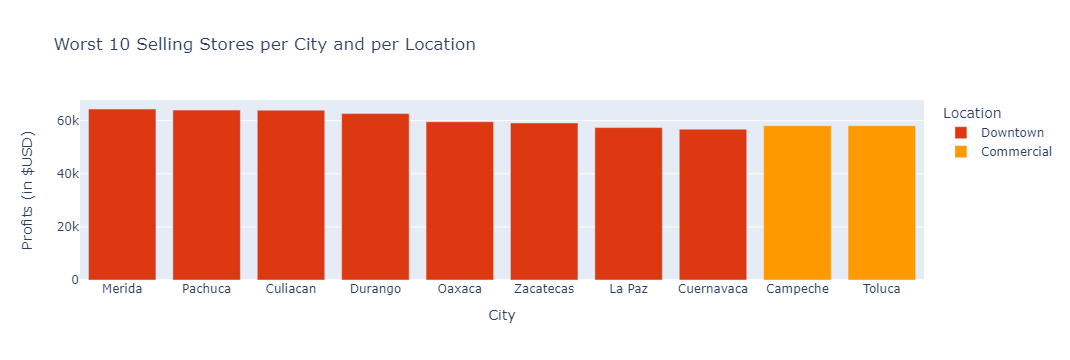

In [40]:
worst_10_stores = px.bar(worst_selling_stores, x = 'Store_City', y = 'Profits', color = 'Store_Location',
                    labels = {
                        'Store_City': 'City',
                        'Profits': 'Profits (in $USD)',
                        'Store_Location': 'Location'
                    },
                     title = 'Worst 10 Selling Stores per City and per Location',
                        color_discrete_map=c
                     )

worst_10_stores.show()

## Let's create a map showing the worst 10 selling stores

In [42]:
# Let's create a map with markers indicating were are the worst selling stores

# Create a map object centered at Mexico
mexico_map = folium.Map(location = [23.624812500000004, -102.57867049999999], zoom_start = 5)
mexico_map

# Let's create a dataset with the coordinates of the cities mentioned in "top_selling_stores" dataset
locations_worst = {'Store_City': ['Merida', 'Pachuca', 'Culiacan', 'Durango', 'Oaxaca', 'Zacatecas', 'Campeche', 'Toluca',\
                           'La Paz', 'Cuernavaca'],
             'Store_Name': ['Maven Toys Merida 1', 'Maven Toys Pachuca 1', 'Maven Toys Culiacan 1', \
                           'Maven Toys Durango 1', 'Maven Toys Oaxaca 1', 'Maven Toys Zacatecas 1', 'Maven Toys Campeche 2',\
                           'Maven Toys Toluca 2', 'Maven Toys La Paz 1', 'Maven Toys Cuernavaca 1'],
             'Store_Location' : ['Downtown', 'Downtown', 'Downtown', 'Downtown', 'Downtown', 'Downtown', 'Commercial', 'Commercial',\
                                'Downtown', 'Downtown'],
    'Latitude': [20.9652392, 20.124861, 24.806320, 24.025970, 17.059940, 22.768440, 19.856920, 19.291829, 24.1882, 18.8258],
    'Longitude': [-89.6234779, -98.730872, -107.397820, -104.653210, -96.715030, -102.572480, -90.522520, -99.6640132, -110.5551, -99.1515]
}

locations_frame = pd.DataFrame(locations_worst)

# Let's merge the datasets top_selling_stores and locations_frame

worst_selling_stores = pd.merge(worst_selling_stores, locations_frame, on = ['Store_City', 'Store_Name', 'Store_Location'])

# instantiate a feature group for the sales in the dataframe
sales_feature = plugins.MarkerCluster().add_to(mexico_map)

# loop through the sales and add each to the sales feature group
for lat, long in zip(worst_selling_stores['Latitude'], worst_selling_stores['Longitude']):
    sales_feature.add_child(
        folium.features.CircleMarker(
            [lat, long],
            radius = 5,
            color = 'red',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )


# Lets' add pop-up text to each marker on the map

for lat, long, profits, stores in zip(worst_selling_stores['Latitude'], worst_selling_stores['Longitude'], worst_selling_stores['Profits'], top_selling_stores['Store_Name']):
    folium.Marker([lat, long], icon = None, popup = [profits, stores]).add_to(mexico_map)

mexico_map.add_child(sales_feature)

## Let's calculate the average sales of top 10 selling stores and worst 10 selling stores and compare them with a pie chart

In [44]:
mean_top10 = top_selling_stores['Profits'].sum()

mean_worst10 = worst_selling_stores['Profits'].sum()

ratio_top_worst = mean_top10 / mean_worst10

# Let's create a dictionary containing the average values of profits

avg_sales = {'Type of Ranking': ['Top 10 selling stores', 'Worst 10 selling stores'],
             'Average Values': [mean_top10, mean_worst10]}

avg_sales_frame = pd.DataFrame(avg_sales)

print('Top 10 selling stores outperform worst 10 selling sotres by ', ratio_top_worst)
avg_sales_frame

Top 10 selling stores outperform worst 10 selling sotres by  1.821591302174622


Type of Ranking  Average Values
0    Top 10 selling stores       1100600.0
1  Worst 10 selling stores        604197.0

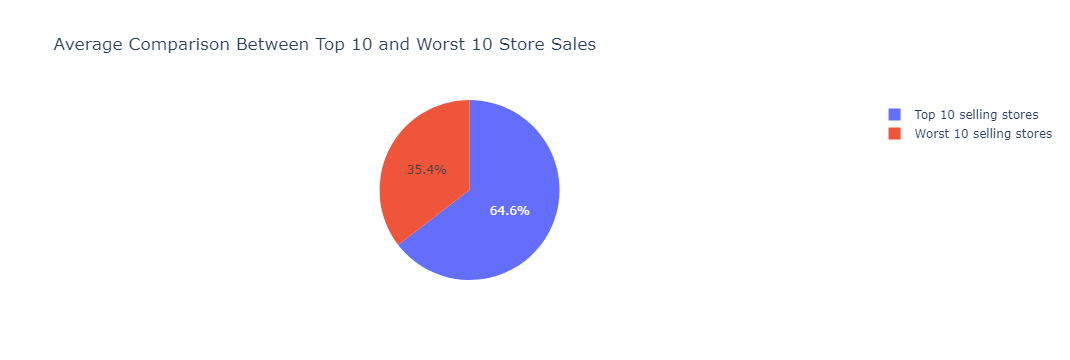

In [45]:
# Let's create the pie chart
pie_avg_sales = px.pie(avg_sales_frame, values = 'Average Values', names = 'Type of Ranking', 
                       title = 'Average Comparison Between Top 10 and Worst 10 Store Sales')

pie_avg_sales.show()

In [46]:
# Let's check for Profits per City

profits_per_city = df_selling_profits.groupby('Store_City')['Profits'].sum().reset_index()
profits_per_city.sort_values('Profits', ascending = False, inplace = True)
profits_per_city = profits_per_city.head(10)
profits_per_city

Store_City   Profits
6   Ciudad de Mexico  465558.0
10       Guadalajara  368930.0
16         Monterrey  346729.0
12        Hermosillo  263608.0
11        Guanajuato  235047.0
20            Puebla  229694.0
15          Mexicali  175048.0
27            Xalapa  163720.0
21          Saltillo  163248.0
24            Toluca  162702.0

In [47]:
# Let's create a map with markers indicating were are the Top 10 selling cities

# Create a map object centered at Mexico
mexico_map = folium.Map(location = [23.624812500000004, -102.57867049999999], zoom_start = 5)
mexico_map

# Let's create a dataset with the coordinates of the cities mentioned in "top_selling_stores" dataset
cities_sales = {'Store_City': ['Ciudad de Mexico', 'Guadalajara', 'Monterrey', 'Hermosillo', 'Guanajuato', 'Puebla', 'Mexicali', 'Xalapa',\
                           'Saltillo', 'Toluca'],
    'Latitude': [19.433229934574655, 20.686700926980784, 25.67673675715804, 29.08293416960552, 21.018140306255958, 19.043799558590383, 32.62441491956269, 19.530044128920736, 25.420144087493806, 19.28999406285754],
    'Longitude': [-99.13208348853102, -103.35074493223279, -100.31269970056309, -110.95394283211056, -101.25595730172304, -98.19790290338653, -115.45263846711572, -96.92281209369224, -100.9972894004247, -99.65593159254855]
}

cities_frame = pd.DataFrame(cities_sales)

# Let's merge the datasets top_selling_stores and locations_frame

profits_per_city = pd.merge(profits_per_city, cities_frame, on = 'Store_City')

# instantiate a feature group for the sales in the dataframe
cities_markers = plugins.MarkerCluster().add_to(mexico_map)

# loop through the sales and add each to the sales feature group
for lat, long in zip(profits_per_city['Latitude'], profits_per_city['Longitude']):
    sales_feature.add_child(
        folium.features.CircleMarker(
            [lat, long],
            radius = 5,
            color = 'red',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )


# Lets' add pop-up text to each marker on the map

for lat, long, profits, cities in zip(profits_per_city['Latitude'], profits_per_city['Longitude'], profits_per_city['Profits'], profits_per_city['Store_City']):
    folium.Marker([lat, long], icon = None, popup = [cities, profits]).add_to(mexico_map)

mexico_map.add_child(cities_markers)

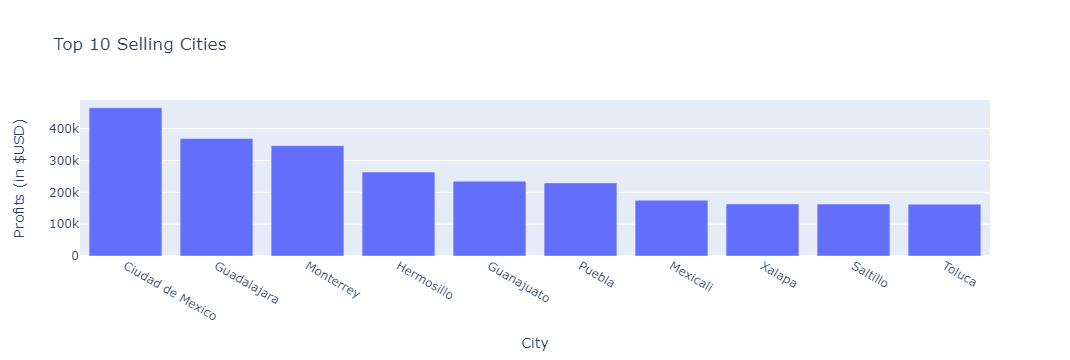

In [48]:
top_10_cities = px.bar(profits_per_city, x = 'Store_City', y = 'Profits',
                    labels = {
                        'Store_City': 'City',
                        'Profits': 'Profits (in $USD)'
                    },
                     title = 'Top 10 Selling Cities'
                     )

top_10_cities.show()

-----

# Let's analyze the sales per store and date

In [51]:
# Let's merge df_sales and df_stores

df_sales_stores = pd.merge(df_sales, df_stores, on = 'Store_ID')
df_sales_stores

Sale_ID       Date  Store_ID  Product_ID  Units  \
0             1 2017-01-01        24           4      1   
1            66 2017-01-01        24           4      1   
2            98 2017-01-01        24           4      1   
3           106 2017-01-01        24          31      1   
4           123 2017-01-01        24          31      1   
...         ...        ...       ...         ...    ...   
829257   829171 2018-09-30        20          21      1   
829258   829175 2018-09-30        20          21      1   
829259   829184 2018-09-30        20          14      3   
829260   829194 2018-09-30        20          19      1   
829261   829224 2018-09-30        20          30      1   

                         Store_Name      Store_City Store_Location  \
0       Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
1       Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
2       Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
3       Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
4       Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
...                             ...             ...            ...   
829257       Maven Toys Zacatecas 1       Zacatecas       Downtown   
829258       Maven Toys Zacatecas 1       Zacatecas       Downtown   
829259       Maven Toys Zacatecas 1       Zacatecas       Downtown   
829260       Maven Toys Zacatecas 1       Zacatecas       Downtown   
829261       Maven Toys Zacatecas 1       Zacatecas       Downtown   

       Store_Open_Date  
0           2010-07-31  
1           2010-07-31  
2           2010-07-31  
3           2010-07-31  
4           2010-07-31  
...                ...  
829257      2009-05-29  
829258      2009-05-29  
829259      2009-05-29  
829260      2009-05-29  
829261      2009-05-29  

[829262 rows x 9 columns]

In [52]:
# Let's obtain months and years for every sale

df_sales_stores['Day Sale'] = df_sales_stores['Date'].dt.day
df_sales_stores['Month Sale'] = df_sales_stores['Date'].dt.month_name()
df_sales_stores['Year Sale'] = df_sales_stores['Date'].dt.strftime('%Y')
#df_sales_stores.drop(columns = ['Month Sale', 'Year Sale'], inplace = True)
df_sales_stores

Sale_ID       Date  Store_ID  Product_ID  Units  \
0             1 2017-01-01        24           4      1   
1            66 2017-01-01        24           4      1   
2            98 2017-01-01        24           4      1   
3           106 2017-01-01        24          31      1   
4           123 2017-01-01        24          31      1   
...         ...        ...       ...         ...    ...   
829257   829171 2018-09-30        20          21      1   
829258   829175 2018-09-30        20          21      1   
829259   829184 2018-09-30        20          14      3   
829260   829194 2018-09-30        20          19      1   
829261   829224 2018-09-30        20          30      1   

                         Store_Name      Store_City Store_Location  \
0       Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
1       Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
2       Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
3       Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
4       Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
...                             ...             ...            ...   
829257       Maven Toys Zacatecas 1       Zacatecas       Downtown   
829258       Maven Toys Zacatecas 1       Zacatecas       Downtown   
829259       Maven Toys Zacatecas 1       Zacatecas       Downtown   
829260       Maven Toys Zacatecas 1       Zacatecas       Downtown   
829261       Maven Toys Zacatecas 1       Zacatecas       Downtown   

       Store_Open_Date  Day Sale Month Sale Year Sale  
0           2010-07-31         1    January      2017  
1           2010-07-31         1    January      2017  
2           2010-07-31         1    January      2017  
3           2010-07-31         1    January      2017  
4           2010-07-31         1    January      2017  
...                ...       ...        ...       ...  
829257      2009-05-29        30  September      2018  
829258      2009-05-29        30  September      2018  
829259      2009-05-29        30  September      2018  
829260      2009-05-29        30  September      2018  
829261      2009-05-29        30  September      2018  

[829262 rows x 12 columns]

In [53]:
# Let's check for data types in df_sales_stores
df_sales_stores.dtypes

Sale_ID                     int64
Date               datetime64[ns]
Store_ID                    int64
Product_ID                  int64
Units                       int64
Store_Name                 object
Store_City                 object
Store_Location             object
Store_Open_Date    datetime64[ns]
Day Sale                    int32
Month Sale                 object
Year Sale                  object
dtype: object

In [54]:
# Let's convert 'Year' from object to integer

df_sales_stores['Year Sale'] = df_sales_stores['Year Sale'].astype(str).astype(int)
df_sales_stores['Day Sale'] = df_sales_stores['Day Sale'].astype(str).astype(int)
df_sales_stores.dtypes

Sale_ID                     int64
Date               datetime64[ns]
Store_ID                    int64
Product_ID                  int64
Units                       int64
Store_Name                 object
Store_City                 object
Store_Location             object
Store_Open_Date    datetime64[ns]
Day Sale                    int64
Month Sale                 object
Year Sale                   int64
dtype: object

# Let's create a dataframe for sales in 2017

In [56]:
df_sales_stores_2017 = df_sales_stores[df_sales_stores['Year Sale'] == 2017]
df_sales_stores_2017.head()

Sale_ID       Date  Store_ID  Product_ID  Units  \
0        1 2017-01-01        24           4      1   
1       66 2017-01-01        24           4      1   
2       98 2017-01-01        24           4      1   
3      106 2017-01-01        24          31      1   
4      123 2017-01-01        24          31      1   

                    Store_Name      Store_City Store_Location Store_Open_Date  \
0  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
1  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
2  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
3  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
4  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   

   Day Sale Month Sale  Year Sale  
0         1    January       2017  
1         1    January       2017  
2         1    January       2017  
3         1    January       2017  
4         1    January       2017

# Let's perform an analysis for stores at airports in Mexico City, Guadalajara and Monterrey in 2017

## Analyze sales for Mexico City's Airport in 2017

In [59]:
# Analyze sales for Mexico City Airport in 2017
df_mexico_airports_2017 = df_sales_stores_2017[(df_sales_stores_2017['Store_Location'] == 'Airport') & (df_sales_stores_2017['Store_City'] == 'Ciudad de Mexico')]
df_mexico_airports_2017.head()

Sale_ID       Date  Store_ID  Product_ID  Units  \
624922      174 2017-01-01        31          18      2   
624923      277 2017-01-01        31           8      1   
624924      327 2017-01-01        31          18      2   
624925      404 2017-01-01        31           8      1   
624926      425 2017-01-01        31          18      2   

                           Store_Name        Store_City Store_Location  \
624922  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
624923  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
624924  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
624925  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
624926  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   

       Store_Open_Date  Day Sale Month Sale  Year Sale  
624922      2012-05-04         1    January       2017  
624923      2012-05-04         1    January       2017  
624924      2012-05-04         1    January       2017  
624925      2012-05-04         1    January       2017  
624926      2012-05-04         1    January       2017

## Let's check for sales over time in 2017 for Mexico City's Airport

In [61]:
# Firstly, let's merge df_mexico_airports_2017 with df_products

prod_mexico_airports_2017 = pd.merge(df_mexico_airports_2017, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_mexico_airports_2017['Profits'] = (prod_mexico_airports_2017['Product_Price'] - prod_mexico_airports_2017['Product_Cost']) * prod_mexico_airports_2017['Units']


# Let's group profits by Day and Month
df_mexico_airports_days_2017 = prod_mexico_airports_2017.groupby(['Day Sale' ,'Month Sale'])['Profits'].sum().reset_index()
df_mexico_airports_days_2017

# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_mexico_airports_days_2017['to_sort']= df_mexico_airports_days_2017['Month Sale'].apply(lambda x:ordered_months.index(x))
df_mexico_airports_days_2017.sort_values(['Day Sale', 'to_sort'], inplace = True)


df_mexico_airports_days_2017

Day Sale Month Sale  Profits  to_sort
4           1    January     84.0        0
3           1   February      4.0        1
7           1      March     24.0        2
0           1      April    405.0        3
8           1        May    554.0        4
..        ...        ...      ...      ...
361        31        May    571.0        4
359        31       July    453.0        6
356        31     August    374.0        7
362        31    October    275.0        9
357        31   December    370.0       11

[363 rows x 4 columns]

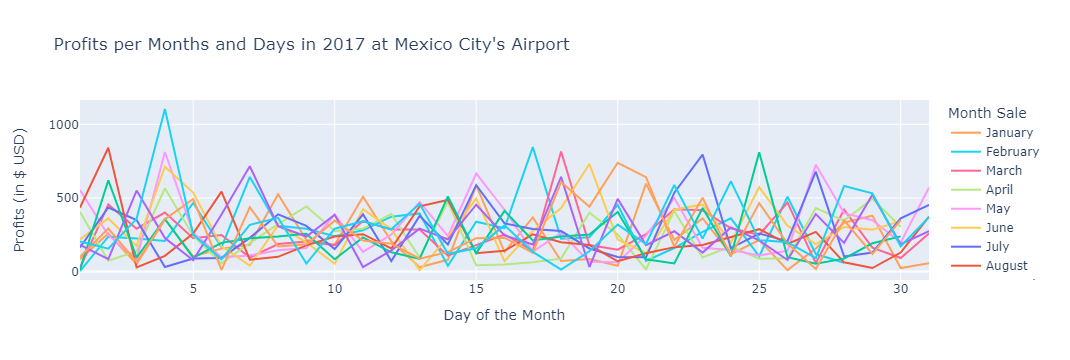

In [62]:
sales_cdmx_airport_2017 = px.line(df_mexico_airports_days_2017, x = 'Day Sale', y = 'Profits',
                     color = 'Month Sale',
                     color_discrete_map=c,
                     title = 'Profits per Months and Days in 2017 at Mexico City\'s Airport', 
                     labels = {'Day Sale': 'Day of the Month',
                               'Profits': 'Profits (in $ USD)'  
                     }
                                 )
sales_cdmx_airport_2017.show()

## Analyze sales for Mexico City's Airport per month in 2017

In [64]:
# First, let's merge df_mexico_airports_2017 with df_products

prod_mexico_airports_2017 = pd.merge(df_mexico_airports_2017, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_mexico_airports_2017['Profits'] = (prod_mexico_airports_2017['Product_Price'] - prod_mexico_airports_2017['Product_Cost']) * prod_mexico_airports_2017['Units']
prod_mexico_airports_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
0      174 2017-01-01        31          18      2   
1      327 2017-01-01        31          18      2   
2      425 2017-01-01        31          18      2   
3     6745 2017-01-07        31          18      1   
4     9756 2017-01-11        31          18      1   

                      Store_Name        Store_City Store_Location  \
0  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
1  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
2  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
3  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
4  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   

  Store_Open_Date  Day Sale Month Sale  Year Sale Product_Name  \
0      2012-05-04         1    January       2017  Lego Bricks   
1      2012-05-04         1    January       2017  Lego Bricks   
2      2012-05-04         1    January       2017  Lego Bricks   
3      2012-05-04         7    January       2017  Lego Bricks   
4      2012-05-04        11    January       2017  Lego Bricks   

  Product_Category  Product_Cost  Product_Price  Profits  
0             Toys         34.99          39.99     10.0  
1             Toys         34.99          39.99     10.0  
2             Toys         34.99          39.99     10.0  
3             Toys         34.99          39.99      5.0  
4             Toys         34.99          39.99      5.0

In [65]:
# Let's group profits by Month
df_mexico_airports_months = prod_mexico_airports_2017.groupby('Month Sale')['Profits'].sum().reset_index()


# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_mexico_airports_months['to_sort']= df_mexico_airports_months['Month Sale'].apply(lambda x:ordered_months.index(x))
df_mexico_airports_months = df_mexico_airports_months.sort_values('to_sort')


# Let's calculate the total Profits for Mexico City Airport in 2017

total_mexico_airport_2017 = df_mexico_airports_months['Profits'].sum()


print('The total profits in 2017 for Mexico City\'s Airport are', '$' ,total_mexico_airport_2017)

df_mexico_airports_months

The total profits in 2017 for Mexico City's Airport are $ 97038.0


Month Sale  Profits  to_sort
4     January   6683.0        0
3    February   7922.0        1
7       March   7969.0        2
0       April   7311.0        3
8         May   9112.0        4
6        June   9160.0        5
5        July   8775.0        6
1      August   6923.0        7
11  September   6943.0        8
10    October   8636.0        9
9    November   8362.0       10
2    December   9242.0       11

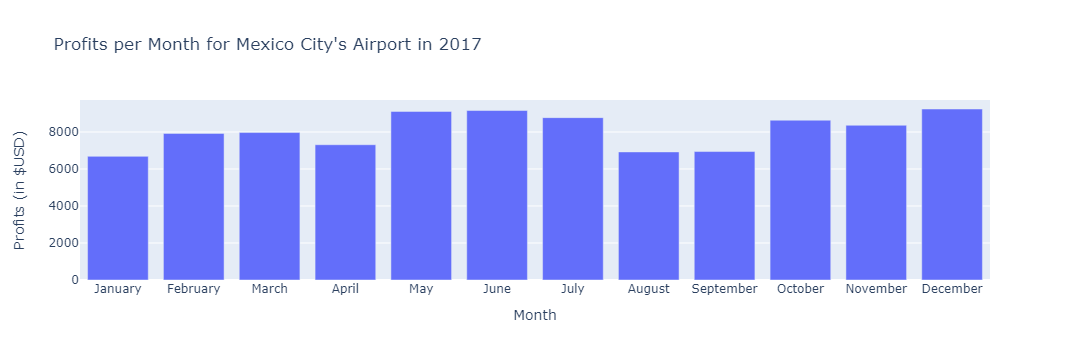

In [66]:
# Let's plot the sales in a bar chart per month for the Mexico City Airport

bar_cdmx_2017 = px.bar(df_mexico_airports_months, x = 'Month Sale', y = 'Profits',
                      labels ={
                          'Month Sale': 'Month',
                          'Profits' : 'Profits (in $USD)'
                      },
                      title = 'Profits per Month for Mexico City\'s Airport in 2017')

bar_cdmx_2017.show()

## Let's analyze sales by product category for Mexico City's Airport in 2017

In [68]:
prod_mexico_airports_2017

cat_mexico_airports_2017 = prod_mexico_airports_2017.groupby(['Product_Category'])['Profits'].sum().reset_index()

cat_mexico_airports_2017.sort_values('Profits', ascending = False, inplace = True)
cat_mexico_airports_2017

Product_Category  Profits
1        Electronics  36942.0
2              Games  25784.0
4               Toys  17528.0
0       Art & Crafts   9400.0
3  Sports & Outdoors   7384.0

## Let's plot Categories for sales in Mexico City's Airport in 2017 with a pie chart

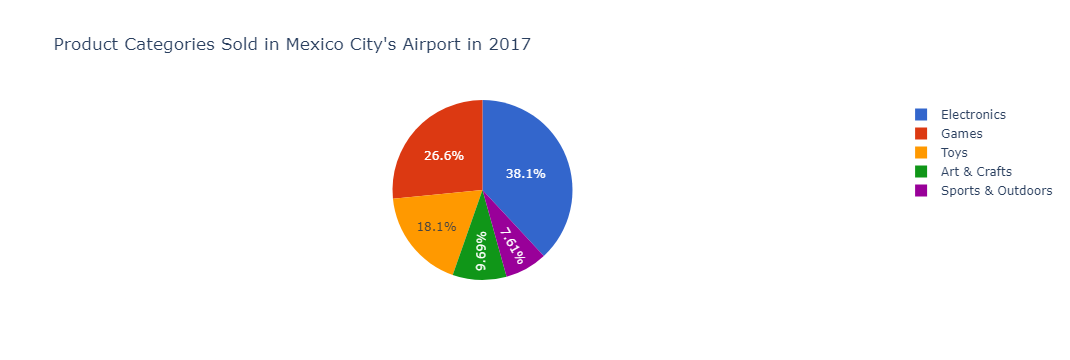

In [70]:
# map Categories to a color
d = dict(zip(cat_mexico_airports_2017['Product_Category'].unique(), px.colors.qualitative.G10))

pie_cat_cdmx_airport_2017 = px.pie(cat_mexico_airports_2017, names = 'Product_Category', values = 'Profits',
                                   color = 'Product_Category',
                                  labels = {
                                     'Product_Category': 'Category',
                                      'Profits': 'Profits (in $USD)'
                                  },
                                  title = 'Product Categories Sold in Mexico City\'s Airport in 2017', 
                                   color_discrete_map=d)

pie_cat_cdmx_airport_2017.show()

## Let's analyze sales for top 10 products in Mexico City's Airport in 2017

In [72]:
top10_mexico_airports_2017 = prod_mexico_airports_2017.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

top10_mexico_airports_2017.sort_values('Profits', ascending = False, inplace = True)
top10_mexico_airports_2017 = top10_mexico_airports_2017.head(10)
top10_mexico_airports_2017

Product_Name   Product_Category  Profits
3         Colorbuds        Electronics  34192.0
10    Glass Marbles              Games  13715.0
5     Deck Of Cards              Games   7737.0
0     Action Figure               Toys   6276.0
14      Lego Bricks               Toys   5635.0
12            Jenga              Games   2968.0
4          Dart Gun  Sports & Outdoors   2640.0
13  Kids Makeup Kit       Art & Crafts   2478.0
1    Animal Figures               Toys   2370.0
2   Barrel O' Slime       Art & Crafts   2360.0

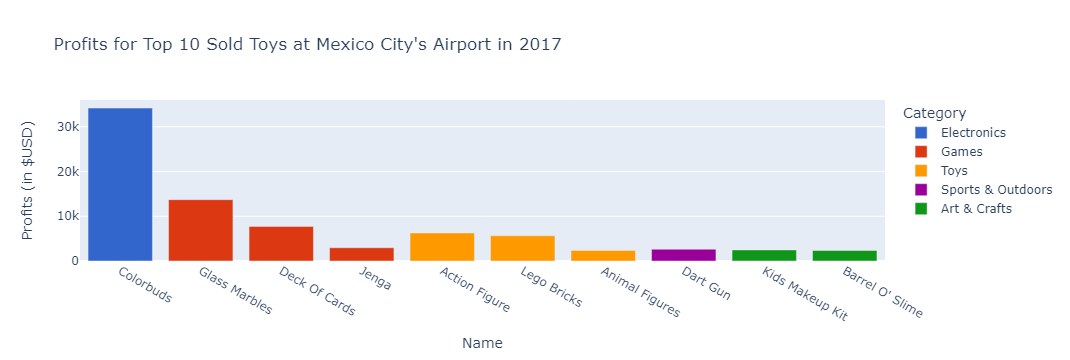

In [73]:
# Let's plot the sales in a bar chart per month for the Mexico City Airport

bar_top10_cdmx_2017 = px.bar(top10_mexico_airports_2017, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for Top 10 Sold Toys at Mexico City\'s Airport in 2017',
                            color_discrete_map=d)

bar_top10_cdmx_2017.show()

## Let's analyze sales for worst 10 products in Mexico City's Airport in 2017

In [75]:
worst10_mexico_airports_2017 = prod_mexico_airports_2017.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

worst10_mexico_airports_2017.sort_values('Profits', ascending = False, inplace = True)
worst10_mexico_airports_2017 = worst10_mexico_airports_2017.tail(10)
worst10_mexico_airports_2017

Product_Name   Product_Category  Profits
21        PlayDoh Toolkit       Art & Crafts    554.0
25  Supersoaker Water Gun  Sports & Outdoors    537.0
20        PlayDoh Playset       Art & Crafts    508.0
27              Toy Robot        Electronics    500.0
6                Dino Egg               Toys    390.0
7        Dinosaur Figures               Toys    360.0
15             Magic Sand       Art & Crafts    328.0
17         Mr. Potatohead               Toys    250.0
26             Teddy Bear               Toys    168.0
16     Mini Ping Pong Set  Sports & Outdoors    168.0

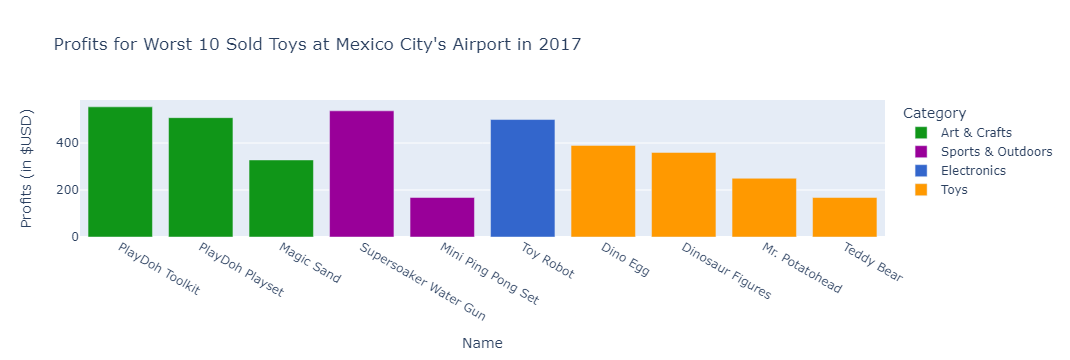

In [76]:
# Let's plot the sales in a bar chart per month for the Mexico City Airport

bar_worst10_cdmx_2017 = px.bar(worst10_mexico_airports_2017, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for Worst 10 Sold Toys at Mexico City\'s Airport in 2017',
                            color_discrete_map=d)

bar_worst10_cdmx_2017.show()

## Let's perform an analysis for the best selling stores which are from the airports in Guadalajara in 2017

In [78]:
# Analyze sales for Guadalajara Airport in 2017
df_guadalajara_airports_2017 = df_sales_stores_2017[(df_sales_stores_2017['Store_Location'] == 'Airport') & (df_sales_stores_2017['Store_City'] == 'Guadalajara')]
df_guadalajara_airports_2017.head()

Sale_ID       Date  Store_ID  Product_ID  Units  \
250860       24 2017-01-01        30          24      1   
250861       47 2017-01-01        30           1      3   
250862       74 2017-01-01        30          24      1   
250863      115 2017-01-01        30           6      3   
250864      160 2017-01-01        30           1      2   

                      Store_Name   Store_City Store_Location Store_Open_Date  \
250860  Maven Toys Guadalajara 3  Guadalajara        Airport      2011-10-20   
250861  Maven Toys Guadalajara 3  Guadalajara        Airport      2011-10-20   
250862  Maven Toys Guadalajara 3  Guadalajara        Airport      2011-10-20   
250863  Maven Toys Guadalajara 3  Guadalajara        Airport      2011-10-20   
250864  Maven Toys Guadalajara 3  Guadalajara        Airport      2011-10-20   

        Day Sale Month Sale  Year Sale  
250860         1    January       2017  
250861         1    January       2017  
250862         1    January       2017  
250863         1    January       2017  
250864         1    January       2017

## Let's check for sales over time in 2017 for Guadalajara's Airport

In [80]:
# Firstly, let's merge df_guadalajara_airports_2017 with df_products

prod_guadalajara_airports_2017 = pd.merge(df_guadalajara_airports_2017, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_guadalajara_airports_2017['Profits'] = (prod_guadalajara_airports_2017['Product_Price'] - prod_guadalajara_airports_2017['Product_Cost']) * prod_guadalajara_airports_2017['Units']


# Let's group profits by Days and Months
df_guadalajara_airports_days_2017 = prod_guadalajara_airports_2017.groupby(['Day Sale' ,'Month Sale'])['Profits'].sum().reset_index()
df_guadalajara_airports_days_2017

# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_guadalajara_airports_days_2017['to_sort']= df_guadalajara_airports_days_2017['Month Sale'].apply(lambda x:ordered_months.index(x))
df_guadalajara_airports_days_2017.sort_values(['Day Sale', 'to_sort'], inplace = True)


df_guadalajara_airports_days_2017

Day Sale Month Sale  Profits  to_sort
4           1    January    391.0        0
3           1   February      7.0        1
7           1      March      6.0        2
0           1      April    268.0        3
8           1        May    281.0        4
..        ...        ...      ...      ...
352        31        May    394.0        4
350        31       July     72.0        6
347        31     August    360.0        7
353        31    October     99.0        9
348        31   December    380.0       11

[354 rows x 4 columns]

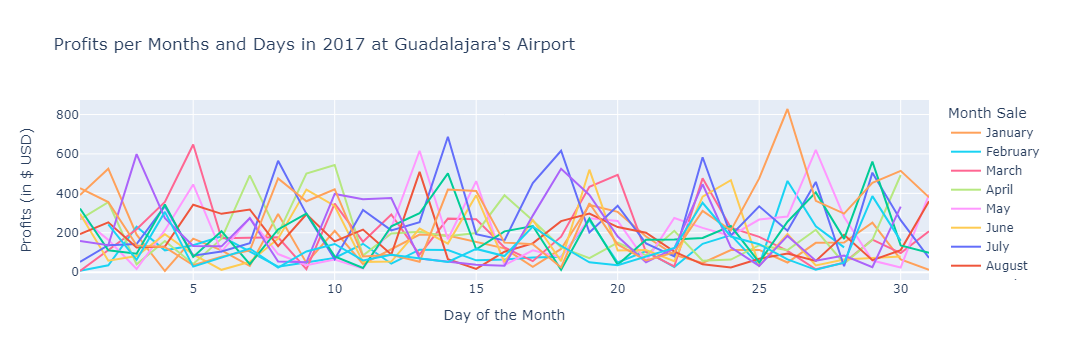

In [81]:
sales_guadalajara_airport_2017 = px.line(df_guadalajara_airports_days_2017, x = 'Day Sale', y = 'Profits',
                     color = 'Month Sale',
                     color_discrete_map=c,
                     title = 'Profits per Months and Days in 2017 at Guadalajara\'s Airport', 
                     labels = {'Day Sale': 'Day of the Month',
                               'Profits': 'Profits (in $ USD)'  
                     }
                                 )
sales_guadalajara_airport_2017.show()

## Analyze sales for Guadalajara Airport per month in 2017

In [83]:
# First, let's merge df_guadalajara_airports_2017 with df_products

prod_guadalajara_airports_2017 = pd.merge(df_guadalajara_airports_2017, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_guadalajara_airports_2017['Profits'] = (prod_guadalajara_airports_2017['Product_Price'] - prod_guadalajara_airports_2017['Product_Cost']) * prod_guadalajara_airports_2017['Units']


# Let's group profits by Month
df_guadalajara_airports_months = prod_guadalajara_airports_2017.groupby('Month Sale')['Profits'].sum().reset_index()


# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_guadalajara_airports_months['to_sort']= df_guadalajara_airports_months['Month Sale'].apply(lambda x:ordered_months.index(x))
df_guadalajara_airports_months = df_guadalajara_airports_months.sort_values('to_sort')


# Let's calculate the total Profits for Mexico City Airport in 2017

total_guadalajara_airport_2017 = df_guadalajara_airports_months['Profits'].sum()


print('The total profits in 2017 for Guadalajara Airport are', '$' ,total_guadalajara_airport_2017)

df_guadalajara_airports_months

The total profits in 2017 for Guadalajara Airport are $ 69087.0


Month Sale  Profits  to_sort
4     January   4678.0        0
3    February   3129.0        1
7       March   5961.0        2
0       April   6210.0        3
8         May   6599.0        4
6        June   4994.0        5
5        July   8227.0        6
1      August   5483.0        7
11  September   3350.0        8
10    October   6141.0        9
9    November   5937.0       10
2    December   8378.0       11

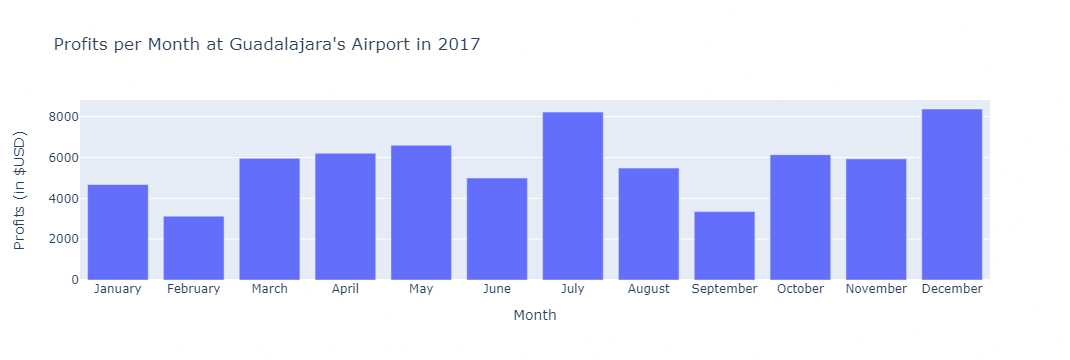

In [84]:
# Let's plot the sales in a bar chart per month for the Guadalajara Airport

bar_guad_2017 = px.bar(df_guadalajara_airports_months, x = 'Month Sale', y = 'Profits',
                      labels ={
                          'Month Sale': 'Month',
                          'Profits' : 'Profits (in $USD)'
                      },
                      title = 'Profits per Month at Guadalajara\'s Airport in 2017')

bar_guad_2017.show()

## Let's analyze sales by product category for Guadalajara in 2017

In [86]:
prod_guadalajara_airports_2017

cat_guad_airports_2017 = prod_guadalajara_airports_2017.groupby(['Product_Category'])['Profits'].sum().reset_index()

cat_guad_airports_2017.sort_values('Profits', ascending = False, inplace = True)
cat_guad_airports_2017

Product_Category  Profits
1        Electronics  26299.0
4               Toys  18001.0
0       Art & Crafts   9626.0
2              Games   8277.0
3  Sports & Outdoors   6884.0

## Let's plot Categories for sales in Guadalajara Airport in 2017 with a pie chart

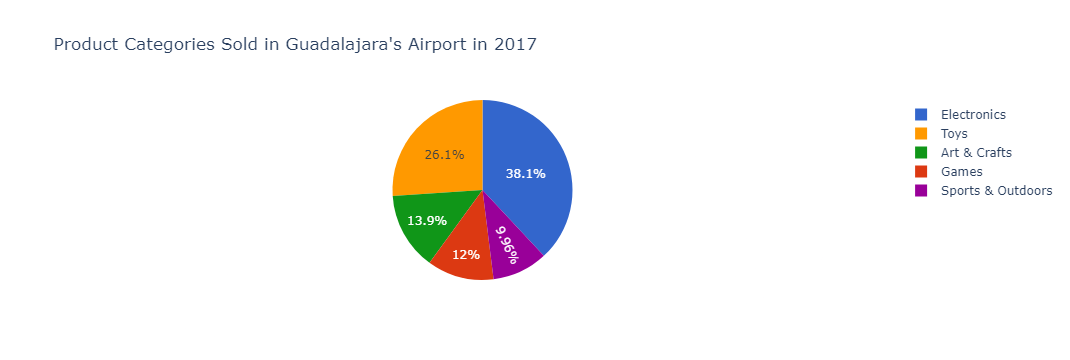

In [88]:
pie_cat_guad_airport_2017 = px.pie(cat_guad_airports_2017, names = 'Product_Category', values = 'Profits', 
                                   color = 'Product_Category',
                                  labels = {
                                     'Product_Category': 'Category',
                                      'Profits': 'Profits (in $USD)'
                                  },
                                  title = 'Product Categories Sold in Guadalajara\'s Airport in 2017',
                                  color_discrete_map=d)

pie_cat_guad_airport_2017.show()

## Let's analyze sales for top 10 products in Guadalajara's Airport in 2017

In [90]:
top10_guad_airports_2017 = prod_guadalajara_airports_2017.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

top10_guad_airports_2017.sort_values('Profits', ascending = False, inplace = True)
top10_guad_airports_2017 = top10_guad_airports_2017.head(10)
top10_guad_airports_2017

Product_Name   Product_Category  Profits
3          Colorbuds        Electronics  23096.0
0      Action Figure               Toys   5808.0
14       Lego Bricks               Toys   3835.0
13   Kids Makeup Kit       Art & Crafts   3420.0
4           Dart Gun  Sports & Outdoors   3176.0
10     Glass Marbles              Games   3090.0
23      Rubik's Cube              Games   2768.0
18          Nerf Gun  Sports & Outdoors   2660.0
7   Dinosaur Figures               Toys   2536.0
1     Animal Figures               Toys   2103.0

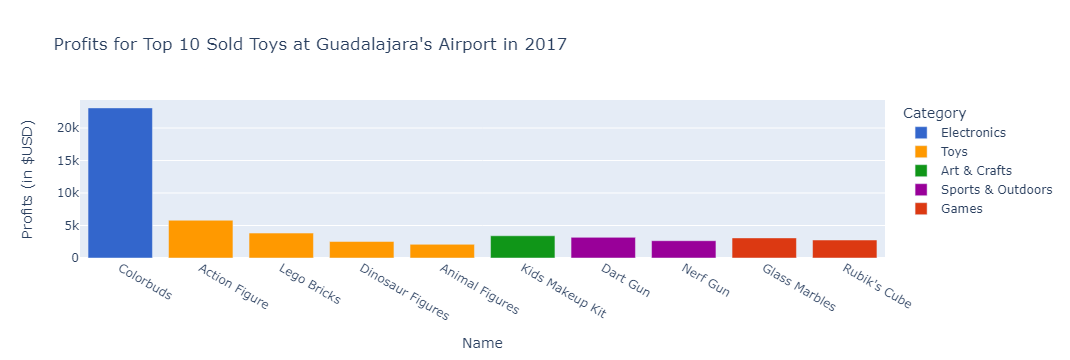

In [91]:
# Let's plot the sales in a bar chart per month for the Guadalajara Airport

bar_top10_guad_2017 = px.bar(top10_guad_airports_2017, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for Top 10 Sold Toys at Guadalajara\'s Airport in 2017',
                            color_discrete_map=d)

bar_top10_guad_2017.show()

## Let's analyze sales for worst 10 products in Guadalajara's Airport in 2017

In [93]:
worst10_guad_airports_2017 = prod_guadalajara_airports_2017.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

worst10_guad_airports_2017.sort_values('Profits', ascending = False, inplace = True)
worst10_guad_airports_2017 = worst10_guad_airports_2017.tail(10)
worst10_guad_airports_2017

Product_Name   Product_Category  Profits
5           Deck Of Cards              Games    942.0
17         Mr. Potatohead               Toys    890.0
21        PlayDoh Toolkit       Art & Crafts    850.0
20        PlayDoh Playset       Art & Crafts    672.0
24           Splash Balls  Sports & Outdoors    658.0
25  Supersoaker Water Gun  Sports & Outdoors    366.0
15             Magic Sand       Art & Crafts    272.0
6                Dino Egg               Toys    220.0
26             Teddy Bear               Toys    116.0
16     Mini Ping Pong Set  Sports & Outdoors     24.0

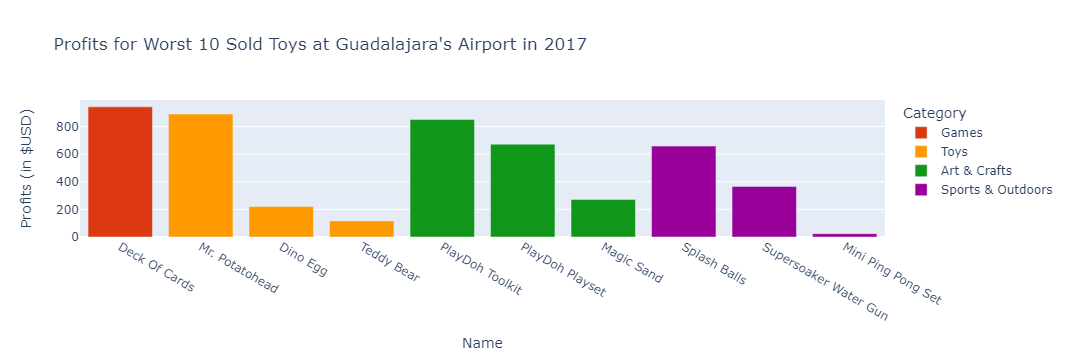

In [94]:
# Let's plot the sales in a bar chart per month for the Guadalajara Airport

bar_top10_guad_2017 = px.bar(worst10_guad_airports_2017, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for Worst 10 Sold Toys at Guadalajara\'s Airport in 2017',
                            color_discrete_map=d)

bar_top10_guad_2017.show()

## Analyze sales for Monterrey's Airport in 2017

In [96]:
# Analyze sales for Monterrey's Airport in 2017
df_monterrey_airports_2017 = df_sales_stores_2017[(df_sales_stores_2017['Store_Location'] == 'Airport') & (df_sales_stores_2017['Store_City'] == 'Monterrey')]
df_monterrey_airports_2017.head()

Sale_ID       Date  Store_ID  Product_ID  Units  \
234811       22 2017-01-01        33          27      1   
234812       37 2017-01-01        33          27      1   
234813       42 2017-01-01        33          27      1   
234814       55 2017-01-01        33          27      1   
234815       67 2017-01-01        33          33      1   

                    Store_Name Store_City Store_Location Store_Open_Date  \
234811  Maven Toys Monterrey 3  Monterrey        Airport      2013-03-17   
234812  Maven Toys Monterrey 3  Monterrey        Airport      2013-03-17   
234813  Maven Toys Monterrey 3  Monterrey        Airport      2013-03-17   
234814  Maven Toys Monterrey 3  Monterrey        Airport      2013-03-17   
234815  Maven Toys Monterrey 3  Monterrey        Airport      2013-03-17   

        Day Sale Month Sale  Year Sale  
234811         1    January       2017  
234812         1    January       2017  
234813         1    January       2017  
234814         1    January       2017  
234815         1    January       2017

## Let's check for sales over time in 2017 for Monterrey's Airport

In [98]:
# Firstly, let's merge df_mexico_airports_2017 with df_products

prod_monterrey_airports_2017 = pd.merge(df_mexico_airports_2017, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_monterrey_airports_2017['Profits'] = (prod_monterrey_airports_2017['Product_Price'] - prod_monterrey_airports_2017['Product_Cost']) * prod_monterrey_airports_2017['Units']


# Let's group profits by Day and Month
df_monterrey_airports_days_2017 = prod_monterrey_airports_2017.groupby(['Day Sale' ,'Month Sale'])['Profits'].sum().reset_index()
df_monterrey_airports_days_2017

# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_monterrey_airports_days_2017['to_sort']= df_monterrey_airports_days_2017['Month Sale'].apply(lambda x:ordered_months.index(x))
df_monterrey_airports_days_2017.sort_values(['Day Sale', 'to_sort'], inplace = True)


df_monterrey_airports_days_2017

Day Sale Month Sale  Profits  to_sort
4           1    January     84.0        0
3           1   February      4.0        1
7           1      March     24.0        2
0           1      April    405.0        3
8           1        May    554.0        4
..        ...        ...      ...      ...
361        31        May    571.0        4
359        31       July    453.0        6
356        31     August    374.0        7
362        31    October    275.0        9
357        31   December    370.0       11

[363 rows x 4 columns]

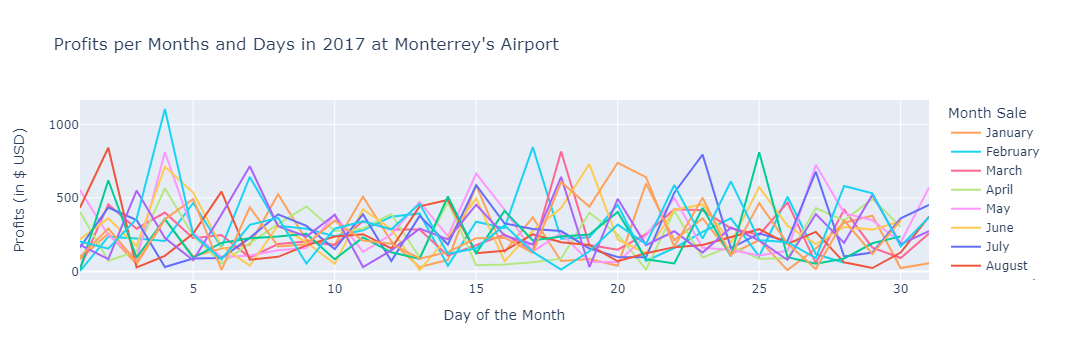

In [99]:
sales_monterrey_airport_2017 = px.line(df_monterrey_airports_days_2017, x = 'Day Sale', y = 'Profits',
                     color = 'Month Sale',
                     color_discrete_map=c,
                     title = 'Profits per Months and Days in 2017 at Monterrey\'s Airport', 
                     labels = {'Day Sale': 'Day of the Month',
                               'Profits': 'Profits (in $ USD)'  
                     }
                                 )
sales_monterrey_airport_2017.show()

## Analyze sales for Monterrey's Airport per month in 2017

In [101]:
# First, let's merge df_monterrey_airports_2017 with df_products

prod_monterrey_airports_2017 = pd.merge(df_monterrey_airports_2017, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_monterrey_airports_2017['Profits'] = (prod_monterrey_airports_2017['Product_Price'] - prod_monterrey_airports_2017['Product_Cost']) * prod_monterrey_airports_2017['Units']
prod_monterrey_airports_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units              Store_Name  \
0       22 2017-01-01        33          27      1  Maven Toys Monterrey 3   
1       37 2017-01-01        33          27      1  Maven Toys Monterrey 3   
2       42 2017-01-01        33          27      1  Maven Toys Monterrey 3   
3       55 2017-01-01        33          27      1  Maven Toys Monterrey 3   
4       99 2017-01-01        33          27      1  Maven Toys Monterrey 3   

  Store_City Store_Location Store_Open_Date  Day Sale Month Sale  Year Sale  \
0  Monterrey        Airport      2013-03-17         1    January       2017   
1  Monterrey        Airport      2013-03-17         1    January       2017   
2  Monterrey        Airport      2013-03-17         1    January       2017   
3  Monterrey        Airport      2013-03-17         1    January       2017   
4  Monterrey        Airport      2013-03-17         1    January       2017   

      Product_Name Product_Category  Product_Cost  Product_Price  Profits  
0  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0  
1  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0  
2  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0  
3  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0  
4  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0

In [102]:
# Let's group profits by Month
df_monterrey_airports_months = prod_monterrey_airports_2017.groupby('Month Sale')['Profits'].sum().reset_index()


# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_monterrey_airports_months['to_sort']= df_monterrey_airports_months['Month Sale'].apply(lambda x:ordered_months.index(x))
df_monterrey_airports_months = df_monterrey_airports_months.sort_values('to_sort')


# Let's calculate the total Profits for Mexico City Airport in 2017

total_monterrey_airport_2017 = df_monterrey_airports_months['Profits'].sum()


print('The total profits in 2017 for Monterrey\'s Airport are', '$' ,total_monterrey_airport_2017)

df_monterrey_airports_months

The total profits in 2017 for Monterrey's Airport are $ 38885.0


Month Sale  Profits  to_sort
4     January   3544.0        0
3    February   3888.0        1
7       March   2859.0        2
0       April   4799.0        3
8         May   3271.0        4
6        June   3027.0        5
5        July   3084.0        6
1      August   1932.0        7
11  September   2580.0        8
10    October   2925.0        9
9    November   3265.0       10
2    December   3711.0       11

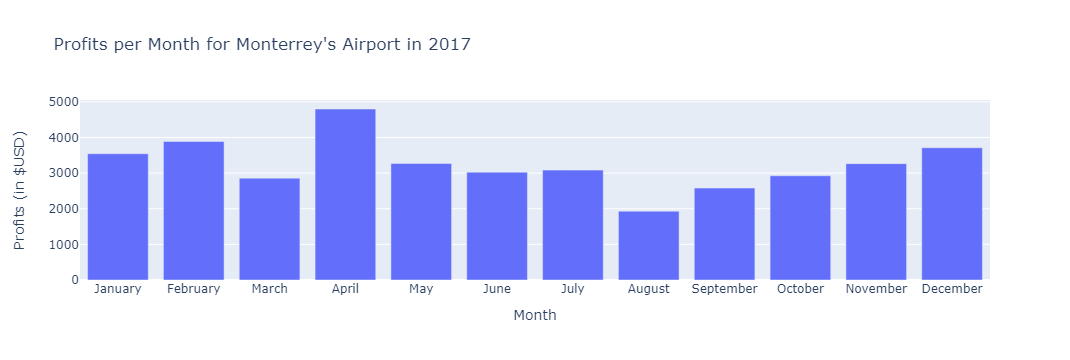

In [103]:
# Let's plot the sales in a bar chart per month for the Monterrey's Airport

bar_monterrey_2017 = px.bar(df_monterrey_airports_months, x = 'Month Sale', y = 'Profits',
                      labels ={
                          'Month Sale': 'Month',
                          'Profits' : 'Profits (in $USD)'
                      },
                      title = 'Profits per Month for Monterrey\'s Airport in 2017')

bar_monterrey_2017.show()

## Let's analyze sales by product category for Monterrey's Airport in 2017

In [105]:
prod_monterrey_airports_2017

cat_monterrey_airports_2017 = prod_monterrey_airports_2017.groupby(['Product_Category'])['Profits'].sum().reset_index()

cat_monterrey_airports_2017.sort_values('Profits', ascending = False, inplace = True)
cat_monterrey_airports_2017

Product_Category  Profits
1        Electronics  13441.0
4               Toys   8761.0
2              Games   8690.0
3  Sports & Outdoors   4397.0
0       Art & Crafts   3596.0

## Let's plot Categories for sales in Monterrey's Airport in 2017 with a pie chart

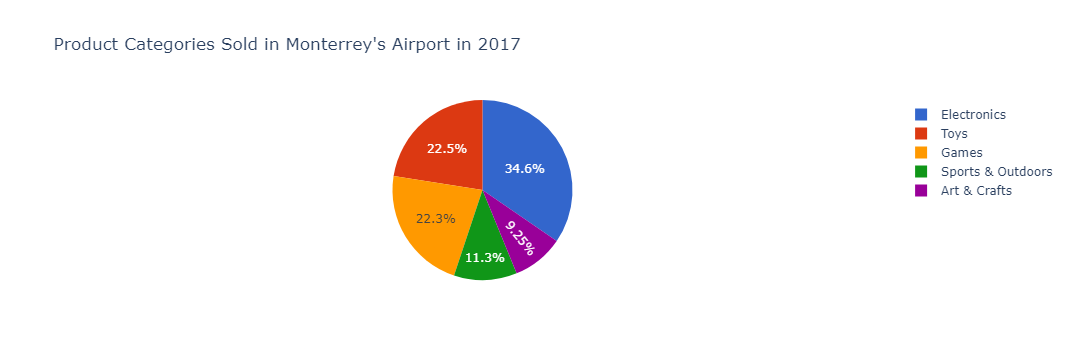

In [107]:
# map Categories to a color
d = dict(zip(cat_monterrey_airports_2017['Product_Category'].unique(), px.colors.qualitative.G10))

pie_cat_monterrey_airport_2017 = px.pie(cat_monterrey_airports_2017, names = 'Product_Category', values = 'Profits',
                                   color = 'Product_Category',
                                  labels = {
                                     'Product_Category': 'Category',
                                      'Profits': 'Profits (in $USD)'
                                  },
                                  title = 'Product Categories Sold in Monterrey\'s Airport in 2017', 
                                   color_discrete_map=d)

pie_cat_monterrey_airport_2017.show()

## Let's analyze sales for top 10 products in Monterrey's Airport in 2017

In [109]:
top10_monterrey_airports_2017 = prod_monterrey_airports_2017.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

top10_monterrey_airports_2017.sort_values('Profits', ascending = False, inplace = True)
top10_monterrey_airports_2017 = top10_monterrey_airports_2017.head(10)
top10_monterrey_airports_2017

Product_Name   Product_Category  Profits
5          Colorbuds        Electronics  12440.0
7      Deck Of Cards              Games   3621.0
12     Glass Marbles              Games   3565.0
0      Action Figure               Toys   2916.0
16       Lego Bricks               Toys   2210.0
15   Kids Makeup Kit       Art & Crafts   1308.0
6           Dart Gun  Sports & Outdoors   1272.0
28      Splash Balls  Sports & Outdoors   1266.0
9   Dinosaur Figures               Toys   1140.0
22          Nerf Gun  Sports & Outdoors    785.0

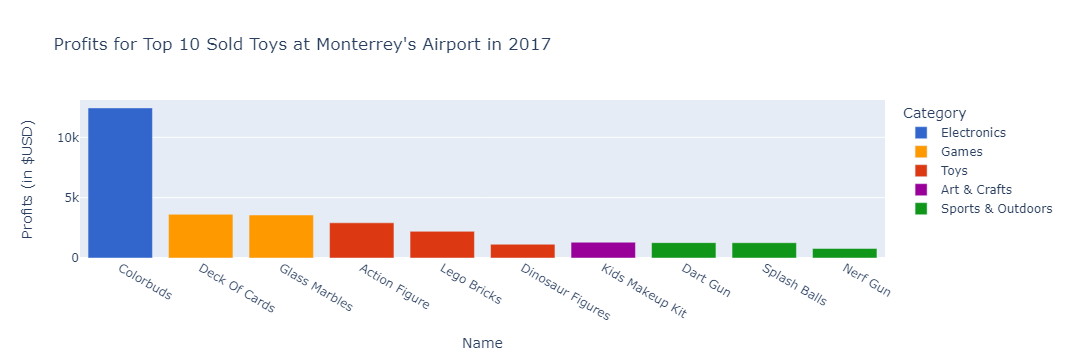

In [110]:
# Let's plot the sales in a bar chart per month for the Monterrey's Airport

bar_top10_monterrey_2017 = px.bar(top10_monterrey_airports_2017, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for Top 10 Sold Toys at Monterrey\'s Airport in 2017',
                            color_discrete_map=d)

bar_top10_monterrey_2017.show()

## Let's analyze sales for worst 10 products in Monterrey's Airport in 2017

In [112]:
worst10_monterrey_airports_2017 = prod_monterrey_airports_2017.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

worst10_monterrey_airports_2017.sort_values('Profits', ascending = False, inplace = True)
worst10_monterrey_airports_2017 = worst10_monterrey_airports_2017.tail(10)
worst10_monterrey_airports_2017

Product_Name   Product_Category  Profits
25        PlayDoh Toolkit       Art & Crafts    233.0
27           Rubik's Cube              Games    232.0
20               Monopoly              Games    168.0
29  Supersoaker Water Gun  Sports & Outdoors    156.0
30             Teddy Bear               Toys    154.0
19     Mini Ping Pong Set  Sports & Outdoors    150.0
4        Classic Dominoes              Games    126.0
32          Uno Card Game              Games    116.0
17             Magic Sand       Art & Crafts    106.0
8                Dino Egg               Toys     85.0

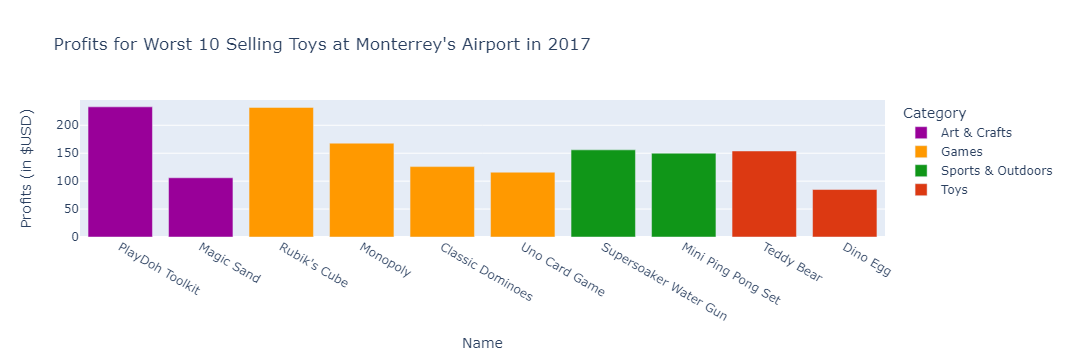

In [113]:
# Let's plot the sales in a bar chart per month for the Mexico City Airport

bar_worst10_monterrey_2017 = px.bar(worst10_monterrey_airports_2017, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for Worst 10 Selling Toys at Monterrey\'s Airport in 2017',
                            color_discrete_map=d)

bar_worst10_monterrey_2017.show()

-----

-----

----

## Let's create a dataframe for sales in 2018

In [118]:
df_sales_stores_2018 = df_sales_stores[df_sales_stores['Year Sale'] == 2018]
df_sales_stores_2018.head()

Sale_ID       Date  Store_ID  Product_ID  Units  \
7881   420945 2018-01-01        24           1      1   
7882   421003 2018-01-01        24          10      1   
7883   421015 2018-01-01        24           1      1   
7884   421115 2018-01-01        24           1      1   
7885   421176 2018-01-01        24          10      1   

                       Store_Name      Store_City Store_Location  \
7881  Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
7882  Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
7883  Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
7884  Maven Toys Aguascalientes 1  Aguascalientes       Downtown   
7885  Maven Toys Aguascalientes 1  Aguascalientes       Downtown   

     Store_Open_Date  Day Sale Month Sale  Year Sale  
7881      2010-07-31         1    January       2018  
7882      2010-07-31         1    January       2018  
7883      2010-07-31         1    January       2018  
7884      2010-07-31         1    January       2018  
7885      2010-07-31         1    January       2018

## Let's perform an analysis for the best selling stores which are from the airports in Mexico City's in 2018

In [120]:
# Analyze sales for Mexico City Airport in 2018
df_mexico_airports_2018 = df_sales_stores_2018[(df_sales_stores_2018['Store_Location'] == 'Airport') & (df_sales_stores_2018['Store_City'] == 'Ciudad de Mexico')]
df_mexico_airports_2018.head()

Sale_ID       Date  Store_ID  Product_ID  Units  \
639606   420879 2018-01-01        31          27      1   
639607   420901 2018-01-01        31           2      1   
639608   420985 2018-01-01        31           6      3   
639609   421049 2018-01-01        31           6      4   
639610   421066 2018-01-01        31          26      1   

                           Store_Name        Store_City Store_Location  \
639606  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
639607  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
639608  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
639609  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
639610  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   

       Store_Open_Date  Day Sale Month Sale  Year Sale  
639606      2012-05-04         1    January       2018  
639607      2012-05-04         1    January       2018  
639608      2012-05-04         1    January       2018  
639609      2012-05-04         1    January       2018  
639610      2012-05-04         1    January       2018

## Let's check for sales over time in 2018 for Mexico City's Airport

In [122]:
# Firstly, let's merge df_mexico_airports_2018 with df_products

prod_mexico_airports_2018 = pd.merge(df_mexico_airports_2018, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_mexico_airports_2018['Profits'] = (prod_mexico_airports_2018['Product_Price'] - prod_mexico_airports_2018['Product_Cost']) * prod_mexico_airports_2018['Units']
prod_mexico_airports_2018.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
0   420879 2018-01-01        31          27      1   
1   421087 2018-01-01        31          27      1   
2   421128 2018-01-01        31          27      1   
3   421218 2018-01-01        31          27      1   
4   421304 2018-01-01        31          27      1   

                      Store_Name        Store_City Store_Location  \
0  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
1  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
2  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
3  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
4  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   

  Store_Open_Date  Day Sale Month Sale  Year Sale     Product_Name  \
0      2012-05-04         1    January       2018  PlayDoh Toolkit   
1      2012-05-04         1    January       2018  PlayDoh Toolkit   
2      2012-05-04         1    January       2018  PlayDoh Toolkit   
3      2012-05-04         1    January       2018  PlayDoh Toolkit   
4      2012-05-04         1    January       2018  PlayDoh Toolkit   

  Product_Category  Product_Cost  Product_Price  Profits  
0     Art & Crafts          3.99           4.99      1.0  
1     Art & Crafts          3.99           4.99      1.0  
2     Art & Crafts          3.99           4.99      1.0  
3     Art & Crafts          3.99           4.99      1.0  
4     Art & Crafts          3.99           4.99      1.0

In [123]:
# Let's group profits by Day and Month
df_mexico_airports_days_2018 = prod_mexico_airports_2018.groupby(['Day Sale' ,'Month Sale'])['Profits'].sum().reset_index()
df_mexico_airports_days_2018

# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_mexico_airports_days_2018['to_sort']= df_mexico_airports_days_2018['Month Sale'].apply(lambda x:ordered_months.index(x))
df_mexico_airports_days_2018.sort_values(['Day Sale', 'to_sort'], inplace = True)

df_mexico_airports_days_2018

Day Sale Month Sale  Profits  to_sort
3           1    January    460.0        0
2           1   February    209.0        1
6           1      March     85.0        2
0           1      April    457.0        3
7           1        May    306.0        4
..        ...        ...      ...      ...
266        31    January    279.0        0
268        31      March    340.0        2
269        31        May    277.0        4
267        31       July    630.0        6
265        31     August     69.0        7

[270 rows x 4 columns]

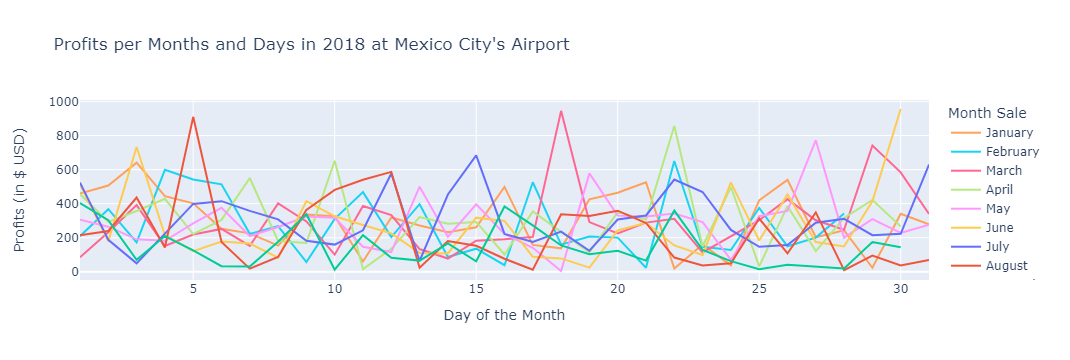

In [124]:
sales_cdmx_airport_2018 = px.line(df_mexico_airports_days_2018, x = 'Day Sale', y = 'Profits',
                     color = 'Month Sale',
                     color_discrete_map=c,
                     title = 'Profits per Months and Days in 2018 at Mexico City\'s Airport', 
                     labels = {'Day Sale': 'Day of the Month',
                               'Profits': 'Profits (in $ USD)'  
                     }
                                 )
sales_cdmx_airport_2018.show()

## Analyze sales for Mexico City's Airport per month in 2018

In [126]:
# First, let's merge df_mexico_airports_2017 with df_products

prod_mexico_airports_2018 = pd.merge(df_mexico_airports_2018, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_mexico_airports_2018['Profits'] = (prod_mexico_airports_2018['Product_Price'] - prod_mexico_airports_2018['Product_Cost']) * prod_mexico_airports_2018['Units']


# Let's group profits by Month
df_mexico_airports_months_2018 = prod_mexico_airports_2018.groupby('Month Sale')['Profits'].sum().reset_index()


# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_mexico_airports_months_2018['to_sort']= df_mexico_airports_months_2018['Month Sale'].apply(lambda x:ordered_months.index(x))
df_mexico_airports_months_2018 = df_mexico_airports_months_2018.sort_values('to_sort')


# Let's calculate the total Profits for Mexico City Airport in 2017

total_mexico_airport_2018 = df_mexico_airports_months_2018['Profits'].sum()


print('The total profits in 2018 for Mexico City\'s Airport are', '$' ,total_mexico_airport_2018)

df_mexico_airports_months_2018

The total profits in 2018 for Mexico City's Airport are $ 72818.0


Month Sale  Profits  to_sort
3    January   9377.0        0
2   February   7708.0        1
6      March   9123.0        2
0      April   8942.0        3
7        May   8868.0        4
5       June   8102.0        5
4       July   9234.0        6
1     August   7112.0        7
8  September   4352.0        8

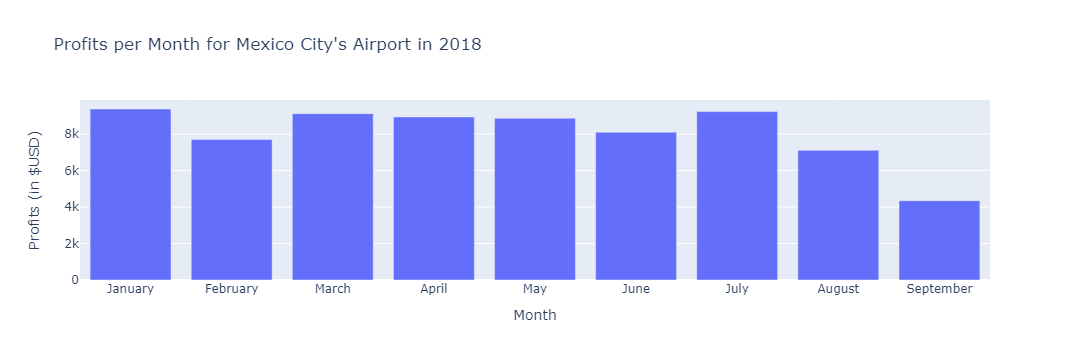

In [127]:
# Let's plot the sales in a bar chart per month for the Mexico City Airtport

bar_cdmx_2018 = px.bar(df_mexico_airports_months_2018, x = 'Month Sale', y = 'Profits',
                      labels ={
                          'Month Sale': 'Month',
                          'Profits' : 'Profits (in $USD)'
                      },
                      title = 'Profits per Month for Mexico City\'s Airport in 2018')

bar_cdmx_2018.show()

## Let's analyze sales by product category for Mexico City's Airport in 2018

In [129]:
prod_mexico_airports_2018

cat_mexico_airports_2018 = prod_mexico_airports_2018.groupby(['Product_Category'])['Profits'].sum().reset_index()

cat_mexico_airports_2018.sort_values('Profits', ascending = False, inplace = True)
cat_mexico_airports_2018

Product_Category  Profits
0       Art & Crafts  17790.0
4               Toys  16853.0
1        Electronics  15641.0
2              Games  13328.0
3  Sports & Outdoors   9206.0

## Let's plot Categories for sales in Mexico City's Airport in 2018 with a pie chart

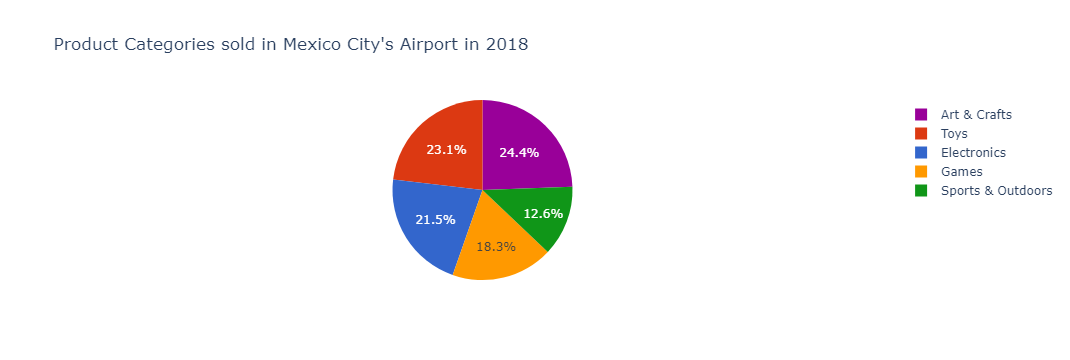

In [131]:
pie_cat_cdmx_airport_2018 = px.pie(cat_mexico_airports_2018, names = 'Product_Category', values = 'Profits',
                                   color = 'Product_Category',
                                  labels = {
                                     'Product_Category': 'Category',
                                      'Profits': 'Profits (in $USD)'
                                  },
                                  title = 'Product Categories sold in Mexico City\'s Airport in 2018',
                                  color_discrete_map=d)

pie_cat_cdmx_airport_2018.show()

## Let's analyze sales for top 10 products in Mexico City's Airport in 2018

In [133]:
top10_mexico_airports_2018 = prod_mexico_airports_2018.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

top10_mexico_airports_2018.sort_values('Profits', ascending = False, inplace = True)
top10_mexico_airports_2018 = top10_mexico_airports_2018.head(10)
top10_mexico_airports_2018

Product_Name   Product_Category  Profits
3          Colorbuds        Electronics  10824.0
5      Deck Of Cards              Games   6213.0
8      Etch A Sketch       Art & Crafts   5380.0
15       Lego Bricks               Toys   5370.0
0      Action Figure               Toys   4986.0
2    Barrel O' Slime       Art & Crafts   4256.0
11     Glass Marbles              Games   4220.0
10  Gamer Headphones        Electronics   4122.0
19          Nerf Gun  Sports & Outdoors   3815.0
16        Magic Sand       Art & Crafts   2992.0

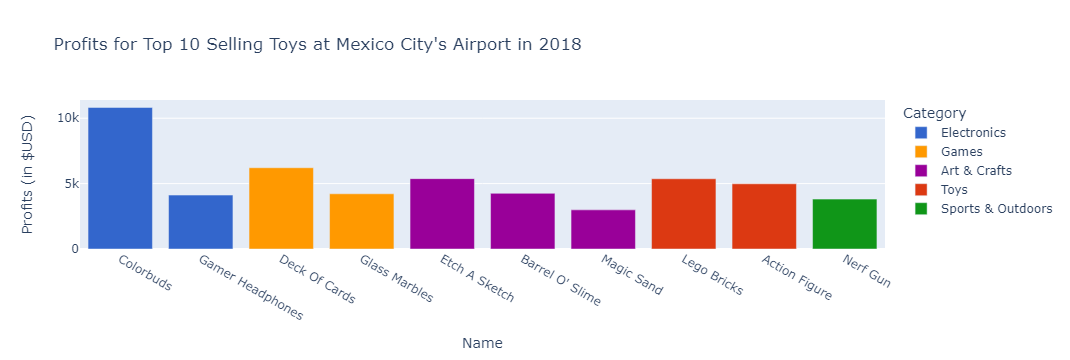

In [134]:
# Let's plot the sales in a bar chart per month for the Mexico City Airport

bar_top10_cdmx_2018 = px.bar(top10_mexico_airports_2018, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for Top 10 Selling Toys at Mexico City\'s Airport in 2018',
                            color_discrete_map=d)

bar_top10_cdmx_2018.show()

## Let's analyze sales for worst 10 products in Mexico City's Airport in 2018

In [136]:
worst10_mexico_airports_2018 = prod_mexico_airports_2018.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

worst10_mexico_airports_2018.sort_values('Profits', ascending = False, inplace = True)
worst10_mexico_airports_2018 = worst10_mexico_airports_2018.tail(10)
worst10_mexico_airports_2018

Product_Name   Product_Category  Profits
4                Dart Gun  Sports & Outdoors   1064.0
12      Hot Wheels 5-Pack               Toys    730.0
29              Toy Robot        Electronics    695.0
6                Dino Egg               Toys    692.0
27  Supersoaker Water Gun  Sports & Outdoors    474.0
23               Playfoam       Art & Crafts    343.0
22        PlayDoh Toolkit       Art & Crafts    335.0
7        Dinosaur Figures               Toys    316.0
21        PlayDoh Playset       Art & Crafts    304.0
28             Teddy Bear               Toys    116.0

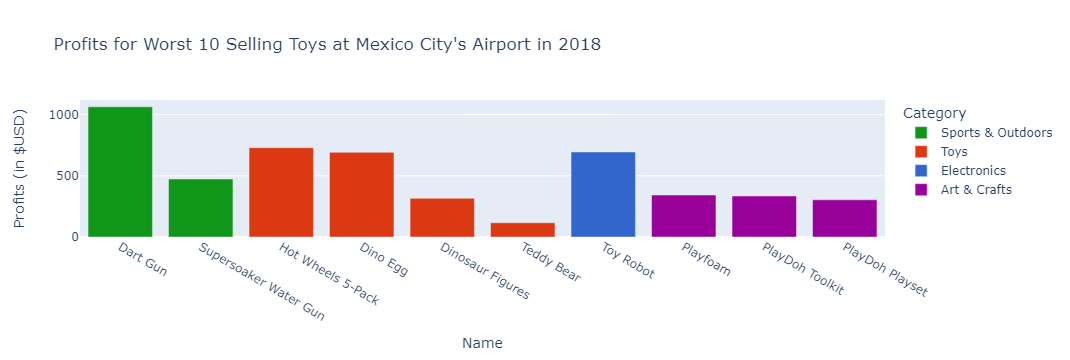

In [137]:
# Let's plot the sales in a bar chart per month for the Mexico City Airport

bar_worst10_cdmx_2018 = px.bar(worst10_mexico_airports_2018, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for Worst 10 Selling Toys at Mexico City\'s Airport in 2018',
                            color_discrete_map=d)

bar_worst10_cdmx_2018.show()

-----

## Let's perform an analysis for the best selling stores which are from the airports in Guadalajara in 2018

In [140]:
# Analayze sales for Guadalajara Airport in 2018
df_guadalajara_airports_2018 = df_sales_stores_2018[(df_sales_stores_2018['Store_Location'] == 'Airport') & (df_sales_stores_2018['Store_City'] == 'Guadalajara')]
df_guadalajara_airports_2018.head()

Sale_ID       Date  Store_ID  Product_ID  Units  \
263120   420919 2018-01-01        30          24      1   
263121   420923 2018-01-01        30           1      1   
263122   420931 2018-01-01        30           1      1   
263123   421013 2018-01-01        30          24      1   
263124   421084 2018-01-01        30           1      1   

                      Store_Name   Store_City Store_Location Store_Open_Date  \
263120  Maven Toys Guadalajara 3  Guadalajara        Airport      2011-10-20   
263121  Maven Toys Guadalajara 3  Guadalajara        Airport      2011-10-20   
263122  Maven Toys Guadalajara 3  Guadalajara        Airport      2011-10-20   
263123  Maven Toys Guadalajara 3  Guadalajara        Airport      2011-10-20   
263124  Maven Toys Guadalajara 3  Guadalajara        Airport      2011-10-20   

        Day Sale Month Sale  Year Sale  
263120         1    January       2018  
263121         1    January       2018  
263122         1    January       2018  
263123         1    January       2018  
263124         1    January       2018

## Let's check for sales over time in 2018 for Guadalajara's Airport

In [142]:
# Firstly, let's merge df_mexico_airports_2018 with df_products

prod_guadalajara_airports_2018 = pd.merge(df_guadalajara_airports_2018, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_guadalajara_airports_2018['Profits'] = (prod_guadalajara_airports_2018['Product_Price'] - prod_guadalajara_airports_2018['Product_Cost']) * prod_guadalajara_airports_2018['Units']
prod_guadalajara_airports_2018.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units                Store_Name  \
0   420919 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
1   421013 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
2   421137 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
3   421165 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
4   421231 2018-01-01        30          24      1  Maven Toys Guadalajara 3   

    Store_City Store_Location Store_Open_Date  Day Sale Month Sale  Year Sale  \
0  Guadalajara        Airport      2011-10-20         1    January       2018   
1  Guadalajara        Airport      2011-10-20         1    January       2018   
2  Guadalajara        Airport      2011-10-20         1    January       2018   
3  Guadalajara        Airport      2011-10-20         1    January       2018   
4  Guadalajara        Airport      2011-10-20         1    January       2018   

  Product_Name   Product_Category  Product_Cost  Product_Price  Profits  
0     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
1     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
2     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
3     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
4     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0

In [143]:
# Let's group profits by Day and Month
df_guadalajara_airports_days_2018 = prod_guadalajara_airports_2018.groupby(['Day Sale' ,'Month Sale'])['Profits'].sum().reset_index()
df_guadalajara_airports_days_2018

# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_guadalajara_airports_days_2018['to_sort']= df_guadalajara_airports_days_2018['Month Sale'].apply(lambda x:ordered_months.index(x))
df_guadalajara_airports_days_2018.sort_values(['Day Sale', 'to_sort'], inplace = True)

df_guadalajara_airports_days_2018

Day Sale Month Sale  Profits  to_sort
3           1    January    126.0        0
2           1   February    292.0        1
6           1      March     62.0        2
0           1      April    759.0        3
7           1        May    120.0        4
..        ...        ...      ...      ...
256        30  September    367.0        8
259        31      March    119.0        2
260        31        May    228.0        4
258        31       July    239.0        6
257        31     August    160.0        7

[261 rows x 4 columns]

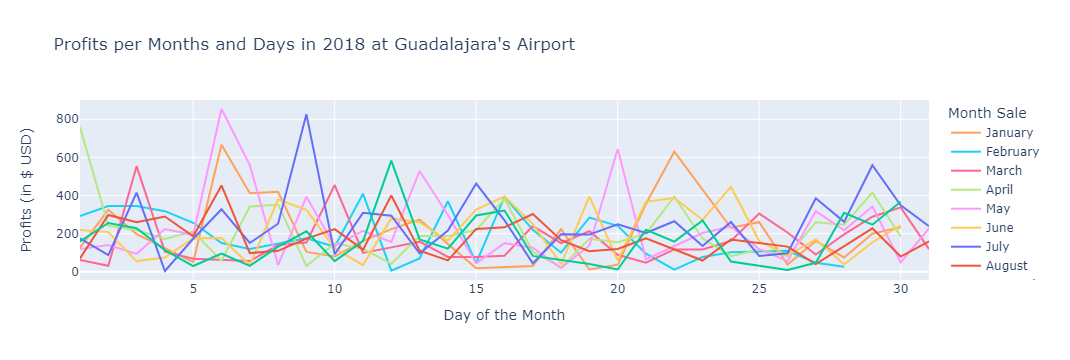

In [144]:
sales_guadalajara_airport_2018 = px.line(df_guadalajara_airports_days_2018, x = 'Day Sale', y = 'Profits',
                     color = 'Month Sale',
                     color_discrete_map=c,
                     title = 'Profits per Months and Days in 2018 at Guadalajara\'s Airport', 
                     labels = {'Day Sale': 'Day of the Month',
                               'Profits': 'Profits (in $ USD)'  
                     }
                                 )
sales_guadalajara_airport_2018.show()

## Analyze sales for Guadalajara Airport per month in 2018

In [146]:
# First, let's merge df_guadalajara_airports_2018 with df_products

prod_guadalajara_airports_2018 = pd.merge(df_guadalajara_airports_2018, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_guadalajara_airports_2018['Profits'] = (prod_guadalajara_airports_2018['Product_Price'] - prod_guadalajara_airports_2018['Product_Cost']) * prod_guadalajara_airports_2018['Units']


# Let's group profits by Month
df_guadalajara_airports_months_2018 = prod_guadalajara_airports_2018.groupby('Month Sale')['Profits'].sum().reset_index()


# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_guadalajara_airports_months_2018['to_sort']= df_guadalajara_airports_months_2018['Month Sale'].apply(lambda x:ordered_months.index(x))
df_guadalajara_airports_months_2018 = df_guadalajara_airports_months_2018.sort_values('to_sort')


# Let's calculate the total Profits for Mexico City Airport in 2017

total_guadalajara_airport_2018 = df_guadalajara_airports_months_2018['Profits'].sum()


print('The total profits in 2018 for Guadalajara Airport are', '$' ,total_guadalajara_airport_2018)

df_guadalajara_airports_months_2018

The total profits in 2018 for Guadalajara Airport are $ 52484.0


Month Sale  Profits  to_sort
3    January   5818.0        0
2   February   4743.0        1
6      March   4927.0        2
0      April   6282.0        3
7        May   6905.0        4
5       June   6304.0        5
4       July   7678.0        6
1     August   5047.0        7
8  September   4780.0        8

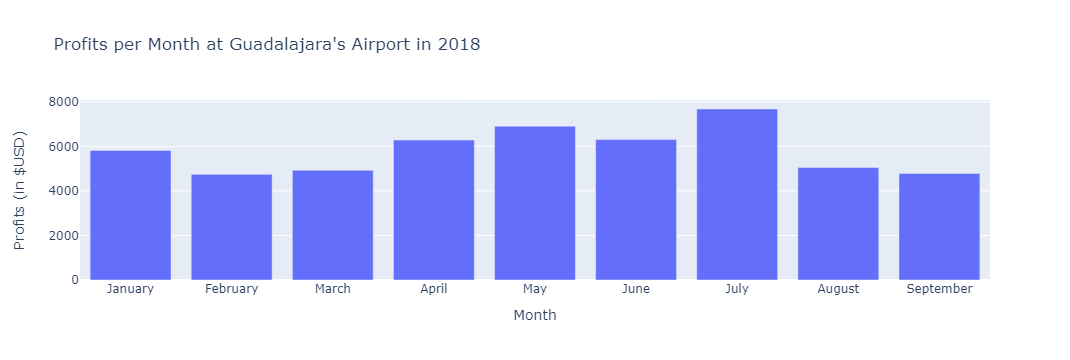

In [147]:
# Let's plot the sales in a bar chart per month for the Guadalajara Airport in 2018

bar_guad_2018 = px.bar(df_guadalajara_airports_months_2018, x = 'Month Sale', y = 'Profits',
                      labels ={
                          'Month Sale': 'Month',
                          'Profits' : 'Profits (in $USD)'
                      },
                      title = 'Profits per Month at Guadalajara\'s Airport in 2018')

bar_guad_2018.show()

## Let's analyze sales by product category for Guadalajara in 2018

In [149]:
prod_guadalajara_airports_2018

cat_guad_airports_2018 = prod_guadalajara_airports_2018.groupby(['Product_Category'])['Profits'].sum().reset_index()

cat_guad_airports_2018.sort_values('Profits', ascending = False, inplace = True)
cat_guad_airports_2018

Product_Category  Profits
4               Toys  17239.0
0       Art & Crafts  13417.0
1        Electronics   9570.0
3  Sports & Outdoors   6442.0
2              Games   5816.0

## Let's plot Categories for sales in Guadalajara Airport in 2017 with a pie chart

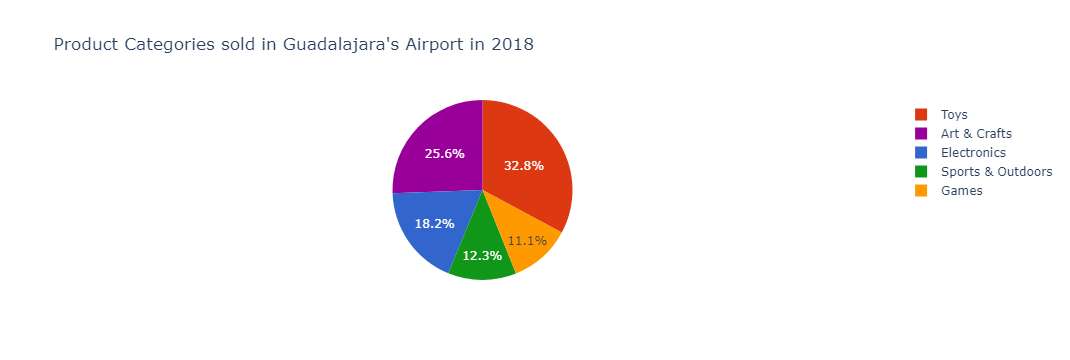

In [151]:
pie_cat_guad_airport_2018 = px.pie(cat_guad_airports_2018, names = 'Product_Category', values = 'Profits',
                                   color = 'Product_Category',
                                  labels = {
                                     'Product_Category': 'Category',
                                      'Profits': 'Profits (in $USD)'
                                  },
                                  title = 'Product Categories sold in Guadalajara\'s Airport in 2018',
                                  color_discrete_map=d)

pie_cat_guad_airport_2018.show()

## Let's analyze sales for top 10 products in Guadalajara Airport in 2018

In [153]:
top10_guad_airports_2018 = prod_guadalajara_airports_2018.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

top10_guad_airports_2018.sort_values('Profits', ascending = False, inplace = True)
top10_guad_airports_2018 = top10_guad_airports_2018.head(10)
top10_guad_airports_2018

Product_Name   Product_Category  Profits
3          Colorbuds        Electronics   7376.0
15       Lego Bricks               Toys   4745.0
0      Action Figure               Toys   4098.0
8      Etch A Sketch       Art & Crafts   3200.0
19          Nerf Gun  Sports & Outdoors   3100.0
7   Dinosaur Figures               Toys   2772.0
2    Barrel O' Slime       Art & Crafts   2738.0
14   Kids Makeup Kit       Art & Crafts   2484.0
16        Magic Sand       Art & Crafts   2242.0
25      Rubik's Cube              Games   2098.0

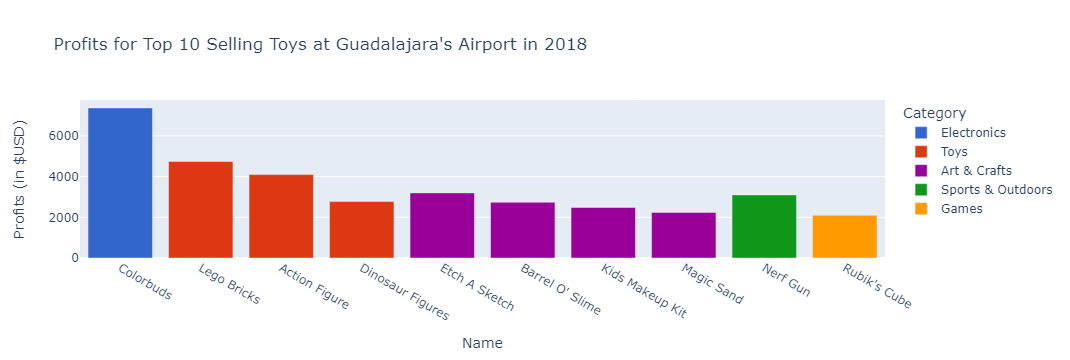

In [154]:
# Let's plot the sales in a bar chart per month for the Guadalajara Airport

bar_top10_guad_2018 = px.bar(top10_guad_airports_2018, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for Top 10 Selling Toys at Guadalajara\'s Airport in 2018',
                            color_discrete_map=d)

bar_top10_guad_2018.show()

## Let's analyze sales for worst 10 products in Guadalajara's Airport in 2018

In [156]:
worst10_guad_airports_2018 = prod_guadalajara_airports_2018.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

worst10_guad_airports_2018.sort_values('Profits', ascending = False, inplace = True)
worst10_guad_airports_2018 = worst10_guad_airports_2018.tail(10)
worst10_guad_airports_2018

Product_Name   Product_Category  Profits
13                  Jenga              Games    693.0
12      Hot Wheels 5-Pack               Toys    686.0
21        PlayDoh Playset       Art & Crafts    636.0
26           Splash Balls  Sports & Outdoors    533.0
22        PlayDoh Toolkit       Art & Crafts    328.0
23               Playfoam       Art & Crafts    322.0
18         Mr. Potatohead               Toys    220.0
17     Mini Ping Pong Set  Sports & Outdoors    168.0
28             Teddy Bear               Toys    168.0
27  Supersoaker Water Gun  Sports & Outdoors     33.0

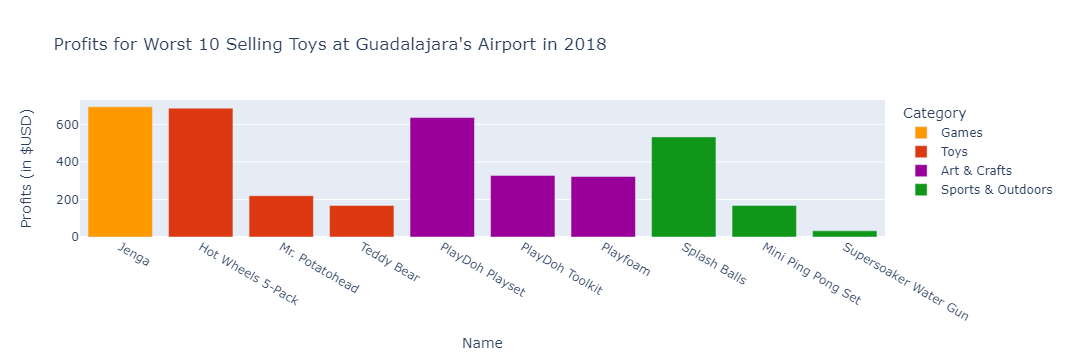

In [157]:
# Let's plot the sales in a bar chart per month for the Guadalajara Airport

bar_top10_guad_2018 = px.bar(worst10_guad_airports_2018, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for Worst 10 Selling Toys at Guadalajara\'s Airport in 2018',
                            color_discrete_map=d)

bar_top10_guad_2018.show()

## Let's perform an analysis for the best selling stores which are from the airports in Monterrey's in 2018

In [159]:
# Analyze sales for Monterrey's Airport in 2018
df_monterrey_airports_2018 = df_sales_stores_2018[(df_sales_stores_2018['Store_Location'] == 'Airport') & (df_sales_stores_2018['Store_City'] == 'Monterrey')]
df_monterrey_airports_2018.head()

Sale_ID       Date  Store_ID  Product_ID  Units  \
242268   420917 2018-01-01        33          32      1   
242269   420946 2018-01-01        33          32      1   
242270   420952 2018-01-01        33           8      1   
242271   420974 2018-01-01        33          23      1   
242272   420991 2018-01-01        33           8      1   

                    Store_Name Store_City Store_Location Store_Open_Date  \
242268  Maven Toys Monterrey 3  Monterrey        Airport      2013-03-17   
242269  Maven Toys Monterrey 3  Monterrey        Airport      2013-03-17   
242270  Maven Toys Monterrey 3  Monterrey        Airport      2013-03-17   
242271  Maven Toys Monterrey 3  Monterrey        Airport      2013-03-17   
242272  Maven Toys Monterrey 3  Monterrey        Airport      2013-03-17   

        Day Sale Month Sale  Year Sale  
242268         1    January       2018  
242269         1    January       2018  
242270         1    January       2018  
242271         1    January       2018  
242272         1    January       2018

## Let's check for sales over time in 2018 for Monterrey's Airport

In [161]:
# Firstly, let's merge df_monterrey_airports_2018 with df_products

prod_monterrey_airports_2018 = pd.merge(df_monterrey_airports_2018, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_monterrey_airports_2018['Profits'] = (prod_monterrey_airports_2018['Product_Price'] - prod_monterrey_airports_2018['Product_Cost']) * prod_monterrey_airports_2018['Units']
prod_monterrey_airports_2018.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units              Store_Name  \
0   420917 2018-01-01        33          32      1  Maven Toys Monterrey 3   
1   420946 2018-01-01        33          32      1  Maven Toys Monterrey 3   
2   421017 2018-01-01        33          32      1  Maven Toys Monterrey 3   
3   421063 2018-01-01        33          32      1  Maven Toys Monterrey 3   
4   421195 2018-01-01        33          32      1  Maven Toys Monterrey 3   

  Store_City Store_Location Store_Open_Date  Day Sale Month Sale  Year Sale  \
0  Monterrey        Airport      2013-03-17         1    January       2018   
1  Monterrey        Airport      2013-03-17         1    January       2018   
2  Monterrey        Airport      2013-03-17         1    January       2018   
3  Monterrey        Airport      2013-03-17         1    January       2018   
4  Monterrey        Airport      2013-03-17         1    January       2018   

            Product_Name   Product_Category  Product_Cost  Product_Price  \
0  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
1  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
2  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
3  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
4  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   

   Profits  
0      3.0  
1      3.0  
2      3.0  
3      3.0  
4      3.0

In [162]:
# Let's group profits by Day and Month
df_monterrey_airports_days_2018 = prod_monterrey_airports_2018.groupby(['Day Sale' ,'Month Sale'])['Profits'].sum().reset_index()
df_monterrey_airports_days_2018

# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_monterrey_airports_days_2018['to_sort']= df_monterrey_airports_days_2018['Month Sale'].apply(lambda x:ordered_months.index(x))
df_monterrey_airports_days_2018.sort_values(['Day Sale', 'to_sort'], inplace = True)

df_monterrey_airports_days_2018

Day Sale Month Sale  Profits  to_sort
2           1    January    192.0        0
1           1   February    380.0        1
5           1      March    515.0        2
0           1      April    485.0        3
6           1        May    119.0        4
..        ...        ...      ...      ...
254        31    January     24.0        0
256        31      March    551.0        2
257        31        May    225.0        4
255        31       July    222.0        6
253        31     August     80.0        7

[258 rows x 4 columns]

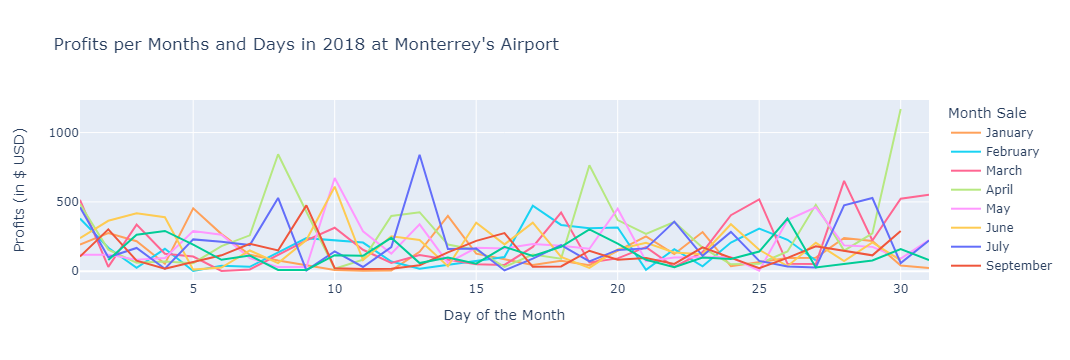

In [163]:
sales_monterrey_airport_2018 = px.line(df_monterrey_airports_days_2018, x = 'Day Sale', y = 'Profits',
                     color = 'Month Sale',
                     color_discrete_map=c,
                     title = 'Profits per Months and Days in 2018 at Monterrey\'s Airport', 
                     labels = {'Day Sale': 'Day of the Month',
                               'Profits': 'Profits (in $ USD)'  
                     }
                                 )
sales_monterrey_airport_2018.show()

## Analyze sales for Monterrey's Airport per month in 2018

In [165]:
# First, let's merge df_monterrey_airports_2017 with df_products

prod_monterrey_airports_2018 = pd.merge(df_monterrey_airports_2018, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
prod_monterrey_airports_2018['Profits'] = (prod_monterrey_airports_2018['Product_Price'] - prod_monterrey_airports_2018['Product_Cost']) * prod_monterrey_airports_2018['Units']


# Let's group profits by Day & Month
df_monterrey_airports_months_2018 = prod_monterrey_airports_2018.groupby('Month Sale')['Profits'].sum().reset_index()


# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

df_monterrey_airports_months_2018['to_sort']= df_monterrey_airports_months_2018['Month Sale'].apply(lambda x:ordered_months.index(x))
df_monterrey_airports_months_2018 = df_monterrey_airports_months_2018.sort_values('to_sort')


# Let's calculate the total Profits for Monterrey's Airport in 2017

total_monterrey_airport_2018 = df_monterrey_airports_months_2018['Profits'].sum()


print('The total profits in 2018 for Monterrey\'s Airport are', '$' ,total_monterrey_airport_2018)

df_monterrey_airports_months_2018

The total profits in 2018 for Monterrey's Airport are $ 47737.0


Month Sale  Profits  to_sort
3    January   4004.0        0
2   February   3906.0        1
6      March   6171.0        2
0      April   8308.0        3
7        May   5727.0        4
5       June   5831.0        5
4       July   6282.0        6
1     August   3860.0        7
8  September   3648.0        8

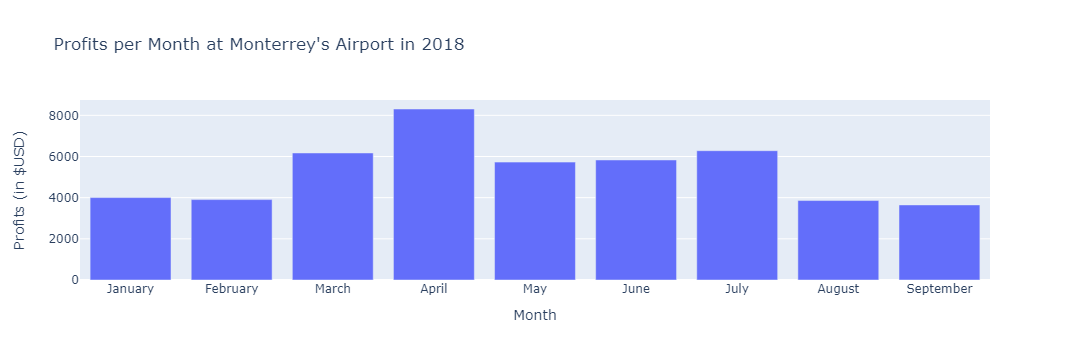

In [166]:
# Let's plot the sales in a bar chart per month for the Monterrey's Airport

bar_monterrey_2018 = px.bar(df_monterrey_airports_months_2018, x = 'Month Sale', y = 'Profits',
                      labels ={
                          'Month Sale': 'Month',
                          'Profits' : 'Profits (in $USD)'
                      },
                      title = 'Profits per Month at Monterrey\'s Airport in 2018')

bar_monterrey_2018.show()

## Let's analyze sales by product category for Monterrey's Airport in 2018

In [168]:
prod_monterrey_airports_2018

cat_monterrey_airports_2018 = prod_monterrey_airports_2018.groupby(['Product_Category'])['Profits'].sum().reset_index()

cat_monterrey_airports_2018.sort_values('Profits', ascending = False, inplace = True)
cat_monterrey_airports_2018

Product_Category  Profits
2              Games  18873.0
4               Toys   9868.0
0       Art & Crafts   7612.0
1        Electronics   6304.0
3  Sports & Outdoors   5080.0

## Let's plot Categories for sales in Monterrey's Airport in 2018 with a pie chart

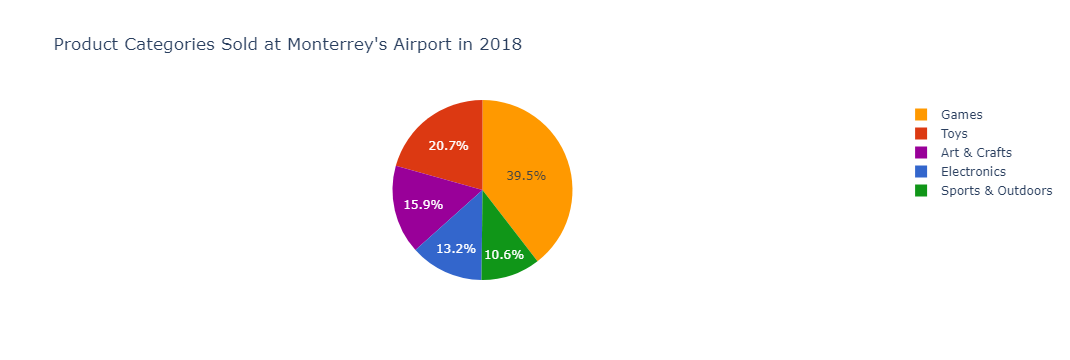

In [170]:
pie_cat_monterrey_airport_2018 = px.pie(cat_monterrey_airports_2018, names = 'Product_Category', values = 'Profits',
                                   color = 'Product_Category',
                                  labels = {
                                     'Product_Category': 'Category',
                                      'Profits': 'Profits (in $USD)'
                                  },
                                  title = 'Product Categories Sold at Monterrey\'s Airport in 2018',
                                  color_discrete_map=d)

pie_cat_monterrey_airport_2018.show()

## Let's analyze sales for top 10 products in Monterrey's Airport in 2018

In [172]:
top10_monterrey_airports_2018 = prod_monterrey_airports_2018.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

top10_monterrey_airports_2018.sort_values('Profits', ascending = False, inplace = True)
top10_monterrey_airports_2018 = top10_monterrey_airports_2018.head(10)
top10_monterrey_airports_2018

Product_Name   Product_Category  Profits
13     Glass Marbles              Games  13215.0
5          Colorbuds        Electronics   3928.0
17       Lego Bricks               Toys   3675.0
7      Deck Of Cards              Games   3648.0
23          Nerf Gun  Sports & Outdoors   2755.0
0      Action Figure               Toys   2358.0
12  Gamer Headphones        Electronics   2136.0
10     Etch A Sketch       Art & Crafts   1760.0
16   Kids Makeup Kit       Art & Crafts   1506.0
2    Barrel O' Slime       Art & Crafts   1162.0

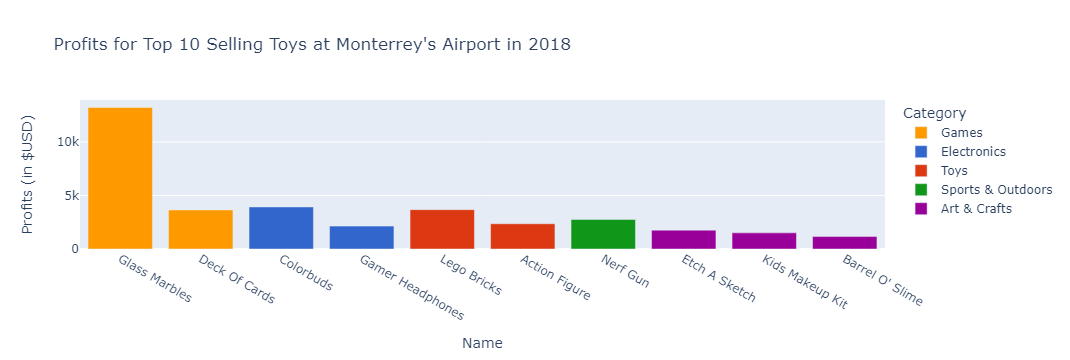

In [173]:
# Let's plot the sales in a bar chart per month for the Mexico City Airport

bar_top10_monterrey_2018 = px.bar(top10_monterrey_airports_2018, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for Top 10 Selling Toys at Monterrey\'s Airport in 2018',
                            color_discrete_map=d)

bar_top10_monterrey_2018.show()

## Let's analyze sales for worst 10 products in Monterrey's Airport in 2018

In [175]:
worst10_monterrey_airports_2018 = prod_monterrey_airports_2018.groupby(['Product_Name', 'Product_Category'])['Profits'].sum().reset_index()

worst10_monterrey_airports_2018.sort_values('Profits', ascending = False, inplace = True)
worst10_monterrey_airports_2018 = worst10_monterrey_airports_2018.tail(10)
worst10_monterrey_airports_2018

Product_Name   Product_Category  Profits
3        Chutes & Ladders              Games    312.0
25        PlayDoh Playset       Art & Crafts    308.0
33              Toy Robot        Electronics    240.0
4        Classic Dominoes              Games    222.0
26        PlayDoh Toolkit       Art & Crafts    217.0
20     Mini Ping Pong Set  Sports & Outdoors    165.0
19   Mini Basketball Hoop  Sports & Outdoors    128.0
31  Supersoaker Water Gun  Sports & Outdoors    102.0
34          Uno Card Game              Games     72.0
32             Teddy Bear               Toys     14.0

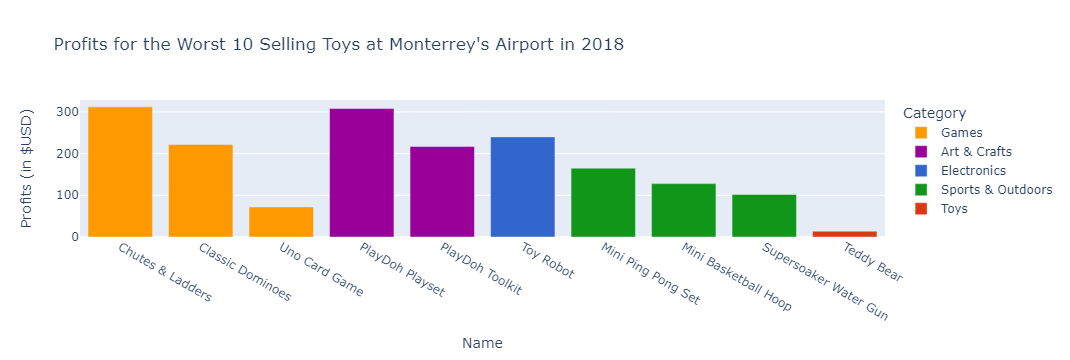

In [176]:
# Let's plot the sales in a bar chart per month for the Monterrey's Airport

bar_worst10_monterrey_2018 = px.bar(worst10_monterrey_airports_2018, x = 'Product_Name', y = 'Profits', color = 'Product_Category',
                      labels ={
                          'Product_Name': 'Name',
                          'Profits' : 'Profits (in $USD)',
                          'Product_Category': 'Category'
                      },
                      title = 'Profits for the Worst 10 Selling Toys at Monterrey\'s Airport in 2018',
                            color_discrete_map=d)

bar_worst10_monterrey_2018.show()

-------

----

------

## Let's examine how sales performed between 2017 and 2018 for Mexico City's airport for the period January-September

In [181]:
df_mexico_airports_months_2018

Month Sale  Profits  to_sort
3    January   9377.0        0
2   February   7708.0        1
6      March   9123.0        2
0      April   8942.0        3
7        May   8868.0        4
5       June   8102.0        5
4       July   9234.0        6
1     August   7112.0        7
8  September   4352.0        8

In [182]:
# Since data for 2018 is available until September, we must create a new dataframe where data includes sales until September 2017

df_mexico_airports_September_2017 = df_mexico_airports_months[(df_mexico_airports_months['Month Sale'] != 'October') & (df_mexico_airports_months['Month Sale'] != 'November') & (df_mexico_airports_months['Month Sale'] != 'December')]

df_mexico_airports_September_2017

Month Sale  Profits  to_sort
4     January   6683.0        0
3    February   7922.0        1
7       March   7969.0        2
0       April   7311.0        3
8         May   9112.0        4
6        June   9160.0        5
5        July   8775.0        6
1      August   6923.0        7
11  September   6943.0        8

## Let's create a dataframe with the profits ratio for Mexico City's sales between January and September

In [184]:
ratio_profits_cdmx = []
for (index2017, row2017), (index2018, row2018) in zip(df_mexico_airports_months_2018.iterrows(), df_mexico_airports_September_2017.iterrows()):
    ratio_profits = row2017['Profits'] / row2018['Profits']
    ratio_profits_cdmx.append(ratio_profits)
    

dict_cdmx = {'Month Sale': df_mexico_airports_months_2018['Month Sale'], 'Profits Ratio': ratio_profits_cdmx}
df_cdmx_profit = pd.DataFrame(dict_cdmx)
df_cdmx_profit

Month Sale  Profits Ratio
3    January       1.403112
2   February       0.972987
6      March       1.144811
0      April       1.223088
7        May       0.973222
5       June       0.884498
4       July       1.052308
1     August       1.027300
8  September       0.626818

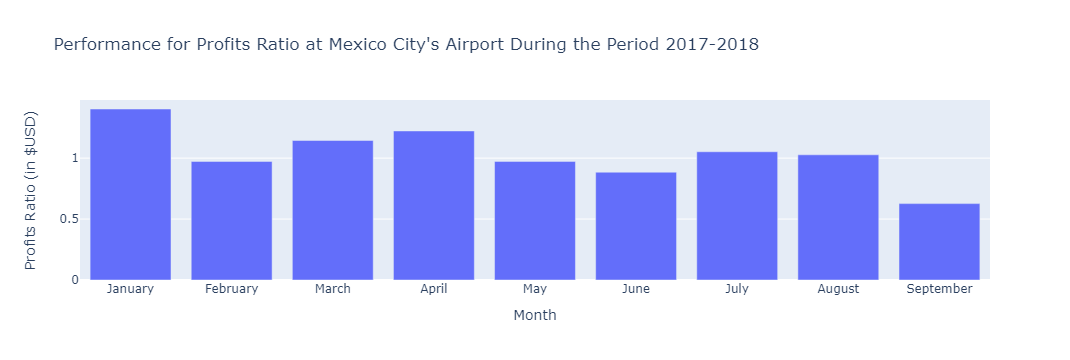

In [185]:
# Let's check the performance of the ration with a bar chart
profits_ratio_cdmx = px.bar(df_cdmx_profit, x = 'Month Sale', y = 'Profits Ratio',
                           labels = {
                               'Month Sale': 'Month',
                               'Profits Ratio': 'Profits Ratio (in $USD)'
                           },
                           title = 'Performance for Profits Ratio at Mexico City\'s Airport During the Period 2017-2018')

profits_ratio_cdmx.show()

------

## Let's examine how sales performed between 2017 and 2018 for Guadalajara's airport for the period January-September

In [188]:
df_guadalajara_airports_months_2018

Month Sale  Profits  to_sort
3    January   5818.0        0
2   February   4743.0        1
6      March   4927.0        2
0      April   6282.0        3
7        May   6905.0        4
5       June   6304.0        5
4       July   7678.0        6
1     August   5047.0        7
8  September   4780.0        8

In [189]:
# Since data for 2018 is available until September, we must create a new dataframe where data includes sales until September 2017

df_guad_airports_September_2017 = df_guadalajara_airports_months[(df_guadalajara_airports_months['Month Sale'] != 'October') & (df_guadalajara_airports_months['Month Sale'] != 'November') & (df_guadalajara_airports_months['Month Sale'] != 'December')]

df_guad_airports_September_2017

Month Sale  Profits  to_sort
4     January   4678.0        0
3    February   3129.0        1
7       March   5961.0        2
0       April   6210.0        3
8         May   6599.0        4
6        June   4994.0        5
5        July   8227.0        6
1      August   5483.0        7
11  September   3350.0        8

## Let's create a dataframe with the profits ratio for Guadalajara's sales between January and September

In [191]:
ratio_profits = []
for (index2017, row2017), (index2018, row2018) in zip(df_guadalajara_airports_months_2018.iterrows(), df_guad_airports_September_2017.iterrows()):
    ratio_profits_guad = row2017['Profits'] / row2018['Profits']
    ratio_profits.append(ratio_profits_guad)
    

dict_guad = {'Month Sale': df_guadalajara_airports_months_2018['Month Sale'], 'Profits Ratio': ratio_profits}
df_guad_profit = pd.DataFrame(dict_guad)
df_guad_profit

Month Sale  Profits Ratio
3    January       1.243694
2   February       1.515820
6      March       0.826539
0      April       1.011594
7        May       1.046371
5       June       1.262315
4       July       0.933269
1     August       0.920481
8  September       1.426866

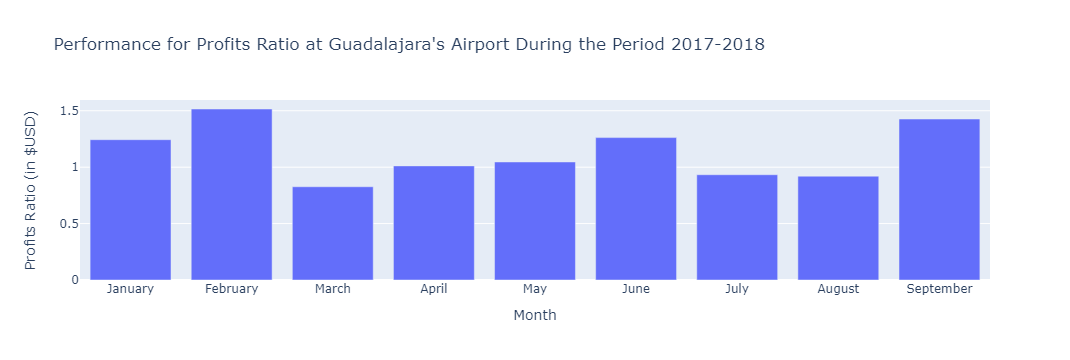

In [192]:
# Let's check the performance of the ration with a bar chart
profits_ratio_guad = px.bar(df_guad_profit, x = 'Month Sale', y = 'Profits Ratio',
                           labels = {
                               'Month Sale': 'Month',
                               'Profits Ratio': 'Profits Ratio (in $USD)'
                           },
                           title = 'Performance for Profits Ratio at Guadalajara\'s Airport During the Period 2017-2018')

profits_ratio_guad.show()

## Let's examine how sales performed between 2017 and 2018 for Monterrey's airport for the period January-September

In [194]:
df_monterrey_airports_months_2018

Month Sale  Profits  to_sort
3    January   4004.0        0
2   February   3906.0        1
6      March   6171.0        2
0      April   8308.0        3
7        May   5727.0        4
5       June   5831.0        5
4       July   6282.0        6
1     August   3860.0        7
8  September   3648.0        8

In [195]:
# Since data for 2018 is available until September, we must create a new dataframe where data includes sales until September 2017

df_monterrey_airports_September_2017 = df_monterrey_airports_months[(df_monterrey_airports_months['Month Sale'] != 'October') & (df_monterrey_airports_months['Month Sale'] != 'November') & (df_monterrey_airports_months['Month Sale'] != 'December')]

df_monterrey_airports_September_2017

Month Sale  Profits  to_sort
4     January   3544.0        0
3    February   3888.0        1
7       March   2859.0        2
0       April   4799.0        3
8         May   3271.0        4
6        June   3027.0        5
5        July   3084.0        6
1      August   1932.0        7
11  September   2580.0        8

## Let's create a dataframe with the profits ratio for Monterrey's sales between January and September

In [197]:
ratio_profits = []
for (index2017, row2017), (index2018, row2018) in zip(df_monterrey_airports_months_2018.iterrows(), df_monterrey_airports_September_2017.iterrows()):
    ratio_profits_monterrey = row2017['Profits'] / row2018['Profits']
    ratio_profits.append(ratio_profits_guad)
    

dict_monterrey = {'Month Sale': df_monterrey_airports_months_2018['Month Sale'], 'Profits Ratio': ratio_profits}
df_monterrey_profit = pd.DataFrame(dict_monterrey)
df_monterrey_profit

Month Sale  Profits Ratio
3    January       1.426866
2   February       1.426866
6      March       1.426866
0      April       1.426866
7        May       1.426866
5       June       1.426866
4       July       1.426866
1     August       1.426866
8  September       1.426866

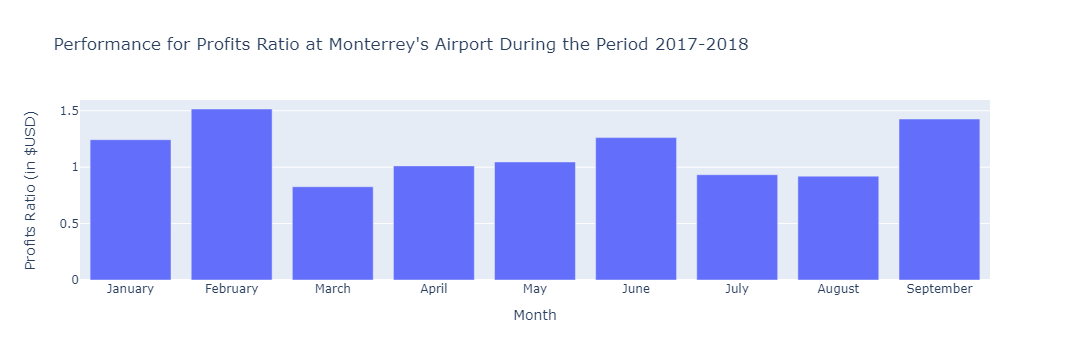

In [198]:
# Let's check the performance of the ration with a bar chart
profits_ratio_monterrey = px.bar(df_guad_profit, x = 'Month Sale', y = 'Profits Ratio',
                           labels = {
                               'Month Sale': 'Month',
                               'Profits Ratio': 'Profits Ratio (in $USD)'
                           },
                           title = 'Performance for Profits Ratio at Monterrey\'s Airport During the Period 2017-2018')

profits_ratio_monterrey.show()

----

-----

-----

# Let's analyze profits/customer for travelers at Mexico City's Airport, Guadalajara's Airport and Monterrey's Airport

## Firstly, let's determine profits/customer for Mexico City's Airport in 2017

In [204]:
# Firstly, let's merge df_mexico_airports_2017 with df_products

profits_mexico_airports_2017 = pd.merge(df_mexico_airports_2017, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
profits_mexico_airports_2017['Profits'] = (profits_mexico_airports_2017['Product_Price'] - profits_mexico_airports_2017['Product_Cost']) * profits_mexico_airports_2017['Units']
profits_mexico_airports_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
0      174 2017-01-01        31          18      2   
1      327 2017-01-01        31          18      2   
2      425 2017-01-01        31          18      2   
3     6745 2017-01-07        31          18      1   
4     9756 2017-01-11        31          18      1   

                      Store_Name        Store_City Store_Location  \
0  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
1  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
2  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
3  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
4  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   

  Store_Open_Date  Day Sale Month Sale  Year Sale Product_Name  \
0      2012-05-04         1    January       2017  Lego Bricks   
1      2012-05-04         1    January       2017  Lego Bricks   
2      2012-05-04         1    January       2017  Lego Bricks   
3      2012-05-04         7    January       2017  Lego Bricks   
4      2012-05-04        11    January       2017  Lego Bricks   

  Product_Category  Product_Cost  Product_Price  Profits  
0             Toys         34.99          39.99     10.0  
1             Toys         34.99          39.99     10.0  
2             Toys         34.99          39.99     10.0  
3             Toys         34.99          39.99      5.0  
4             Toys         34.99          39.99      5.0

In [205]:
# Let's calculate the Profits/Passenger
profits_mexico_airports_2017['Profits per Passenger'] = profits_mexico_airports_2017['Profits'] / profits_mexico_airports_2017['Units']
profits_mexico_airports_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
0      174 2017-01-01        31          18      2   
1      327 2017-01-01        31          18      2   
2      425 2017-01-01        31          18      2   
3     6745 2017-01-07        31          18      1   
4     9756 2017-01-11        31          18      1   

                      Store_Name        Store_City Store_Location  \
0  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
1  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
2  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
3  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
4  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   

  Store_Open_Date  Day Sale Month Sale  Year Sale Product_Name  \
0      2012-05-04         1    January       2017  Lego Bricks   
1      2012-05-04         1    January       2017  Lego Bricks   
2      2012-05-04         1    January       2017  Lego Bricks   
3      2012-05-04         7    January       2017  Lego Bricks   
4      2012-05-04        11    January       2017  Lego Bricks   

  Product_Category  Product_Cost  Product_Price  Profits  \
0             Toys         34.99          39.99     10.0   
1             Toys         34.99          39.99     10.0   
2             Toys         34.99          39.99     10.0   
3             Toys         34.99          39.99      5.0   
4             Toys         34.99          39.99      5.0   

   Profits per Passenger  
0                    5.0  
1                    5.0  
2                    5.0  
3                    5.0  
4                    5.0

In [206]:
# Let's group the profits per passenger, by month
profits_passenger_cdmx_2017 = profits_mexico_airports_2017.groupby(['Month Sale', 'Product_Category'])['Profits per Passenger'].mean().reset_index()
profits_passenger_cdmx_2017

# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

profits_passenger_cdmx_2017['to_sort']= profits_passenger_cdmx_2017['Month Sale'].apply(lambda x:ordered_months.index(x))
profits_passenger_cdmx_2017.sort_values(['to_sort'], inplace = True)

profits_passenger_cdmx_2017.head(5)

Month Sale   Product_Category  Profits per Passenger  to_sort
24    January               Toys               3.601990        0
23    January  Sports & Outdoors               3.429687        0
22    January              Games               3.790875        0
21    January        Electronics               8.000000        0
20    January       Art & Crafts               1.235294        0

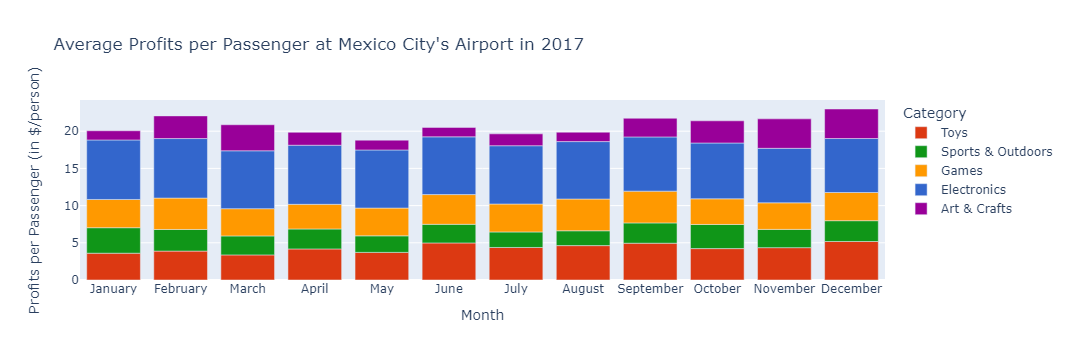

In [207]:
# Let's plot the Profits/Passenger with a bar chart
profits_passenger_cdmx_2017_bar = px.bar(profits_passenger_cdmx_2017, x = 'Month Sale', y = 'Profits per Passenger',
                                     color = 'Product_Category',
                                     labels= {
                                        'Month Sale': 'Month',
                                        'Profits per Passenger': 'Profits per Passenger (in $/person)',
                                         'Product_Category': 'Category',
                                     },
                                    color_discrete_map=d,
                                    title = "Average Profits per Passenger at Mexico City\'s Airport in 2017")

profits_passenger_cdmx_2017_bar.show()

## Secondly, let's determine profits/customer for Mexico City's Airport in 2018

In [209]:
# First, let's merge df_mexico_airports_2018 with df_products

profits_mexico_airports_2018 = pd.merge(df_mexico_airports_2018, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
profits_mexico_airports_2018['Profits'] = (profits_mexico_airports_2018['Product_Price'] - profits_mexico_airports_2018['Product_Cost']) * profits_mexico_airports_2018['Units']
profits_mexico_airports_2018.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
0   420879 2018-01-01        31          27      1   
1   421087 2018-01-01        31          27      1   
2   421128 2018-01-01        31          27      1   
3   421218 2018-01-01        31          27      1   
4   421304 2018-01-01        31          27      1   

                      Store_Name        Store_City Store_Location  \
0  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
1  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
2  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
3  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
4  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   

  Store_Open_Date  Day Sale Month Sale  Year Sale     Product_Name  \
0      2012-05-04         1    January       2018  PlayDoh Toolkit   
1      2012-05-04         1    January       2018  PlayDoh Toolkit   
2      2012-05-04         1    January       2018  PlayDoh Toolkit   
3      2012-05-04         1    January       2018  PlayDoh Toolkit   
4      2012-05-04         1    January       2018  PlayDoh Toolkit   

  Product_Category  Product_Cost  Product_Price  Profits  
0     Art & Crafts          3.99           4.99      1.0  
1     Art & Crafts          3.99           4.99      1.0  
2     Art & Crafts          3.99           4.99      1.0  
3     Art & Crafts          3.99           4.99      1.0  
4     Art & Crafts          3.99           4.99      1.0

In [210]:
# Let's calculate the Profits/Passenger
profits_mexico_airports_2018['Profits per Passenger'] = profits_mexico_airports_2018['Profits'] / profits_mexico_airports_2018['Units']
profits_mexico_airports_2018.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
0   420879 2018-01-01        31          27      1   
1   421087 2018-01-01        31          27      1   
2   421128 2018-01-01        31          27      1   
3   421218 2018-01-01        31          27      1   
4   421304 2018-01-01        31          27      1   

                      Store_Name        Store_City Store_Location  \
0  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
1  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
2  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
3  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   
4  Maven Toys Ciudad de Mexico 2  Ciudad de Mexico        Airport   

  Store_Open_Date  Day Sale Month Sale  Year Sale     Product_Name  \
0      2012-05-04         1    January       2018  PlayDoh Toolkit   
1      2012-05-04         1    January       2018  PlayDoh Toolkit   
2      2012-05-04         1    January       2018  PlayDoh Toolkit   
3      2012-05-04         1    January       2018  PlayDoh Toolkit   
4      2012-05-04         1    January       2018  PlayDoh Toolkit   

  Product_Category  Product_Cost  Product_Price  Profits  \
0     Art & Crafts          3.99           4.99      1.0   
1     Art & Crafts          3.99           4.99      1.0   
2     Art & Crafts          3.99           4.99      1.0   
3     Art & Crafts          3.99           4.99      1.0   
4     Art & Crafts          3.99           4.99      1.0   

   Profits per Passenger  
0                    1.0  
1                    1.0  
2                    1.0  
3                    1.0  
4                    1.0

In [211]:
# Let's group the profits per passenger, by month
profits_passenger_cdmx_2018 = profits_mexico_airports_2018.groupby(['Month Sale', 'Product_Category'])['Profits per Passenger'].mean().reset_index()
profits_passenger_cdmx_2018

# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

profits_passenger_cdmx_2018['to_sort']= profits_passenger_cdmx_2018['Month Sale'].apply(lambda x:ordered_months.index(x))
profits_passenger_cdmx_2018.sort_values(['to_sort'], inplace = True)

profits_passenger_cdmx_2018.head(5)

Month Sale   Product_Category  Profits per Passenger  to_sort
19    January               Toys               4.557432        0
18    January  Sports & Outdoors               3.405714        0
17    January              Games               3.194595        0
16    January        Electronics               7.357860        0
15    January       Art & Crafts               3.667482        0

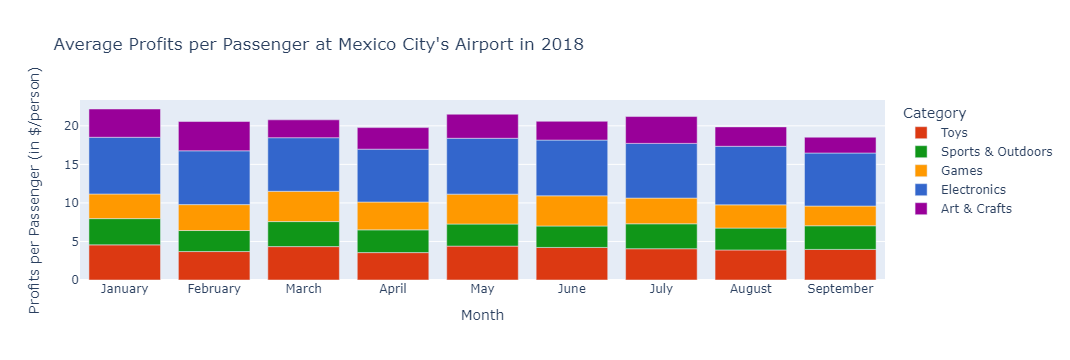

In [212]:
# Let's plot the Profits/Passenger with a bar chart
profits_passenger_cdmx_2018_bar = px.bar(profits_passenger_cdmx_2018, x = 'Month Sale', y = 'Profits per Passenger',
                                     color = 'Product_Category',
                                     labels= {
                                        'Month Sale': 'Month',
                                        'Profits per Passenger': 'Profits per Passenger (in $/person)',
                                         'Product_Category': 'Category',
                                     },
                                    color_discrete_map=d,
                                    title = "Average Profits per Passenger at Mexico City\'s Airport in 2018")

profits_passenger_cdmx_2018_bar.show()

-----

## Let's first determine profits/customer for Guadalajara's Airport in 2017

In [215]:
# First, let's merge df_guadalajara_airports_2017 with df_products

profits_guadalajara_airports_2017 = pd.merge(df_guadalajara_airports_2017, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
profits_guadalajara_airports_2017['Profits'] = (profits_guadalajara_airports_2017['Product_Price'] - profits_guadalajara_airports_2017['Product_Cost']) * profits_guadalajara_airports_2017['Units']
profits_guadalajara_airports_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units                Store_Name  \
0       24 2017-01-01        30          24      1  Maven Toys Guadalajara 3   
1       74 2017-01-01        30          24      1  Maven Toys Guadalajara 3   
2      215 2017-01-01        30          24      1  Maven Toys Guadalajara 3   
3      272 2017-01-01        30          24      1  Maven Toys Guadalajara 3   
4      338 2017-01-01        30          24      1  Maven Toys Guadalajara 3   

    Store_City Store_Location Store_Open_Date  Day Sale Month Sale  Year Sale  \
0  Guadalajara        Airport      2011-10-20         1    January       2017   
1  Guadalajara        Airport      2011-10-20         1    January       2017   
2  Guadalajara        Airport      2011-10-20         1    January       2017   
3  Guadalajara        Airport      2011-10-20         1    January       2017   
4  Guadalajara        Airport      2011-10-20         1    January       2017   

  Product_Name   Product_Category  Product_Cost  Product_Price  Profits  
0     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
1     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
2     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
3     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
4     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0

In [216]:
# Let's calculate the Profits/Passenger
profits_guadalajara_airports_2017['Profits per Passenger'] = profits_guadalajara_airports_2017['Profits'] / profits_guadalajara_airports_2017['Units']
profits_guadalajara_airports_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units                Store_Name  \
0       24 2017-01-01        30          24      1  Maven Toys Guadalajara 3   
1       74 2017-01-01        30          24      1  Maven Toys Guadalajara 3   
2      215 2017-01-01        30          24      1  Maven Toys Guadalajara 3   
3      272 2017-01-01        30          24      1  Maven Toys Guadalajara 3   
4      338 2017-01-01        30          24      1  Maven Toys Guadalajara 3   

    Store_City Store_Location Store_Open_Date  Day Sale Month Sale  Year Sale  \
0  Guadalajara        Airport      2011-10-20         1    January       2017   
1  Guadalajara        Airport      2011-10-20         1    January       2017   
2  Guadalajara        Airport      2011-10-20         1    January       2017   
3  Guadalajara        Airport      2011-10-20         1    January       2017   
4  Guadalajara        Airport      2011-10-20         1    January       2017   

  Product_Name   Product_Category  Product_Cost  Product_Price  Profits  \
0     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0   
1     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0   
2     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0   
3     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0   
4     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0   

   Profits per Passenger  
0                    5.0  
1                    5.0  
2                    5.0  
3                    5.0  
4                    5.0

In [217]:
# Let's group the profits per passenger, by month
profits_passenger_guad_2017 = profits_guadalajara_airports_2017.groupby(['Month Sale', 'Product_Category'])['Profits per Passenger'].mean().reset_index()
profits_passenger_guad_2017
# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

profits_passenger_guad_2017['to_sort']= profits_passenger_guad_2017['Month Sale'].apply(lambda x:ordered_months.index(x))
profits_passenger_guad_2017.sort_values(['to_sort'], inplace = True)

profits_passenger_guad_2017.head(5)

Month Sale   Product_Category  Profits per Passenger  to_sort
24    January               Toys               3.771429        0
23    January  Sports & Outdoors               3.651376        0
22    January              Games               3.352273        0
21    January        Electronics               7.911765        0
20    January       Art & Crafts               2.093750        0

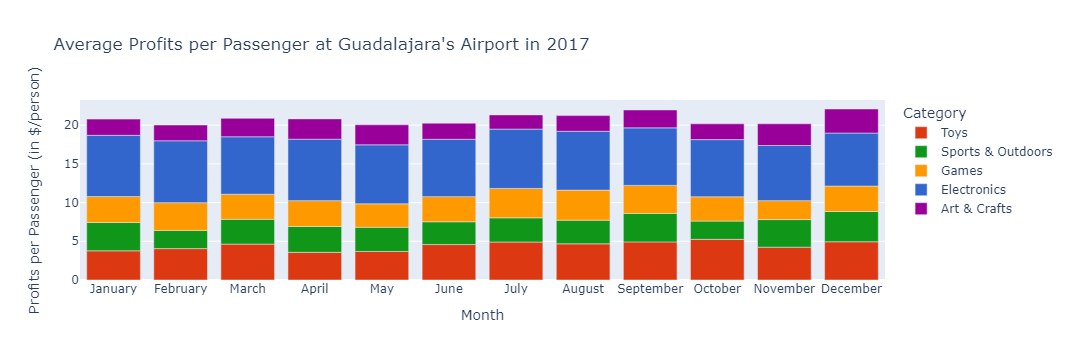

In [218]:
# Let's plot the Profits/Passenger with a bar chart
profits_passenger_guad_2017_bar = px.bar(profits_passenger_guad_2017, x = 'Month Sale', y = 'Profits per Passenger',
                                     color = 'Product_Category',
                                     labels= {
                                        'Month Sale': 'Month',
                                        'Profits per Passenger': 'Profits per Passenger (in $/person)',
                                         'Product_Category': 'Category',
                                     },
                                    color_discrete_map=d,
                                    title = "Average Profits per Passenger at Guadalajara\'s Airport in 2017")

profits_passenger_guad_2017_bar.show()

## Secondly, we obtain data from Guadalajara's Airport in 2018

In [220]:
# Firstly, let's merge df_guadalajara_airports_2018 with df_products

profits_guadalajara_airports_2018 = pd.merge(df_guadalajara_airports_2018, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
profits_guadalajara_airports_2018['Profits'] = (profits_guadalajara_airports_2018['Product_Price'] - profits_guadalajara_airports_2018['Product_Cost']) * profits_guadalajara_airports_2018['Units']
profits_guadalajara_airports_2018.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units                Store_Name  \
0   420919 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
1   421013 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
2   421137 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
3   421165 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
4   421231 2018-01-01        30          24      1  Maven Toys Guadalajara 3   

    Store_City Store_Location Store_Open_Date  Day Sale Month Sale  Year Sale  \
0  Guadalajara        Airport      2011-10-20         1    January       2018   
1  Guadalajara        Airport      2011-10-20         1    January       2018   
2  Guadalajara        Airport      2011-10-20         1    January       2018   
3  Guadalajara        Airport      2011-10-20         1    January       2018   
4  Guadalajara        Airport      2011-10-20         1    January       2018   

  Product_Name   Product_Category  Product_Cost  Product_Price  Profits  
0     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
1     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
2     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
3     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0  
4     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0

In [221]:
# Let's calculate the Profits/Passenger
profits_guadalajara_airports_2018['Profits per Passenger'] = profits_guadalajara_airports_2018['Profits'] / profits_guadalajara_airports_2018['Units']
profits_guadalajara_airports_2018.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units                Store_Name  \
0   420919 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
1   421013 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
2   421137 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
3   421165 2018-01-01        30          24      1  Maven Toys Guadalajara 3   
4   421231 2018-01-01        30          24      1  Maven Toys Guadalajara 3   

    Store_City Store_Location Store_Open_Date  Day Sale Month Sale  Year Sale  \
0  Guadalajara        Airport      2011-10-20         1    January       2018   
1  Guadalajara        Airport      2011-10-20         1    January       2018   
2  Guadalajara        Airport      2011-10-20         1    January       2018   
3  Guadalajara        Airport      2011-10-20         1    January       2018   
4  Guadalajara        Airport      2011-10-20         1    January       2018   

  Product_Name   Product_Category  Product_Cost  Product_Price  Profits  \
0     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0   
1     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0   
2     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0   
3     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0   
4     Nerf Gun  Sports & Outdoors         14.99          19.99      5.0   

   Profits per Passenger  
0                    5.0  
1                    5.0  
2                    5.0  
3                    5.0  
4                    5.0

In [222]:
# Let's group the profits per passenger, by month
profits_passenger_guad_2018 = profits_guadalajara_airports_2018.groupby(['Month Sale', 'Product_Category'])['Profits per Passenger'].mean().reset_index()
profits_passenger_guad_2018

# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

profits_passenger_guad_2018['to_sort']= profits_passenger_guad_2018['Month Sale'].apply(lambda x:ordered_months.index(x))
profits_passenger_guad_2018.sort_values(['to_sort'], inplace = True)

profits_passenger_guad_2018.head(5)

Month Sale   Product_Category  Profits per Passenger  to_sort
19    January               Toys               4.430108        0
18    January  Sports & Outdoors               3.784173        0
17    January              Games               3.164835        0
16    January        Electronics               7.050000        0
15    January       Art & Crafts               3.382637        0

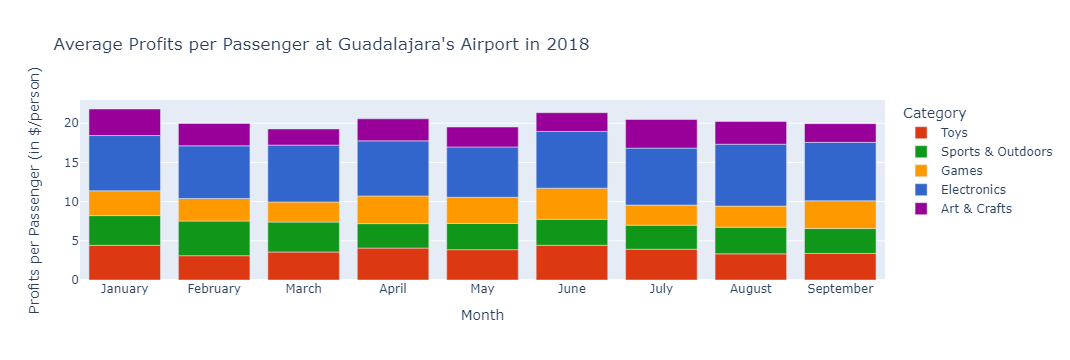

In [223]:
# Let's plot the Profits/Passenger with a bar chart
profits_passenger_guad_2018_bar = px.bar(profits_passenger_guad_2018, x = 'Month Sale', y = 'Profits per Passenger',
                                     color = 'Product_Category',
                                     labels= {
                                        'Month Sale': 'Month',
                                        'Profits per Passenger': 'Profits per Passenger (in $/person)',
                                         'Product_Category': 'Category',
                                     },
                                    color_discrete_map=d,
                                    title = "Average Profits per Passenger at Guadalajara\'s Airport in 2018")

profits_passenger_guad_2018_bar.show()

-----

## Let's first determine profits/customer for Monterrey's Airport in 2017

In [226]:
# First, let's merge df_monterrey_airports_2017 with df_products

profits_monterrey_airports_2017 = pd.merge(df_monterrey_airports_2017, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
profits_monterrey_airports_2017['Profits'] = (profits_monterrey_airports_2017['Product_Price'] - profits_monterrey_airports_2017['Product_Cost']) * profits_monterrey_airports_2017['Units']
profits_monterrey_airports_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units              Store_Name  \
0       22 2017-01-01        33          27      1  Maven Toys Monterrey 3   
1       37 2017-01-01        33          27      1  Maven Toys Monterrey 3   
2       42 2017-01-01        33          27      1  Maven Toys Monterrey 3   
3       55 2017-01-01        33          27      1  Maven Toys Monterrey 3   
4       99 2017-01-01        33          27      1  Maven Toys Monterrey 3   

  Store_City Store_Location Store_Open_Date  Day Sale Month Sale  Year Sale  \
0  Monterrey        Airport      2013-03-17         1    January       2017   
1  Monterrey        Airport      2013-03-17         1    January       2017   
2  Monterrey        Airport      2013-03-17         1    January       2017   
3  Monterrey        Airport      2013-03-17         1    January       2017   
4  Monterrey        Airport      2013-03-17         1    January       2017   

      Product_Name Product_Category  Product_Cost  Product_Price  Profits  
0  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0  
1  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0  
2  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0  
3  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0  
4  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0

In [227]:
# Let's calculate the Profits/Passenger
profits_monterrey_airports_2017['Profits per Passenger'] = profits_monterrey_airports_2017['Profits'] / profits_monterrey_airports_2017['Units']
profits_monterrey_airports_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units              Store_Name  \
0       22 2017-01-01        33          27      1  Maven Toys Monterrey 3   
1       37 2017-01-01        33          27      1  Maven Toys Monterrey 3   
2       42 2017-01-01        33          27      1  Maven Toys Monterrey 3   
3       55 2017-01-01        33          27      1  Maven Toys Monterrey 3   
4       99 2017-01-01        33          27      1  Maven Toys Monterrey 3   

  Store_City Store_Location Store_Open_Date  Day Sale Month Sale  Year Sale  \
0  Monterrey        Airport      2013-03-17         1    January       2017   
1  Monterrey        Airport      2013-03-17         1    January       2017   
2  Monterrey        Airport      2013-03-17         1    January       2017   
3  Monterrey        Airport      2013-03-17         1    January       2017   
4  Monterrey        Airport      2013-03-17         1    January       2017   

      Product_Name Product_Category  Product_Cost  Product_Price  Profits  \
0  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0   
1  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0   
2  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0   
3  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0   
4  PlayDoh Toolkit     Art & Crafts          3.99           4.99      1.0   

   Profits per Passenger  
0                    1.0  
1                    1.0  
2                    1.0  
3                    1.0  
4                    1.0

In [228]:
# Let's group the profits per passenger, by month
profits_passenger_monterrey_2017 = profits_monterrey_airports_2017.groupby(['Month Sale', 'Product_Category'])['Profits per Passenger'].mean().reset_index()
profits_passenger_monterrey_2017
# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

profits_passenger_monterrey_2017['to_sort']= profits_passenger_monterrey_2017['Month Sale'].apply(lambda x:ordered_months.index(x))
profits_passenger_monterrey_2017.sort_values(['to_sort'], inplace = True)

profits_passenger_monterrey_2017.head(5)

Month Sale   Product_Category  Profits per Passenger  to_sort
24    January               Toys               3.213115        0
23    January  Sports & Outdoors               4.500000        0
22    January              Games               3.711712        0
21    January        Electronics               7.694268        0
20    January       Art & Crafts               1.000000        0

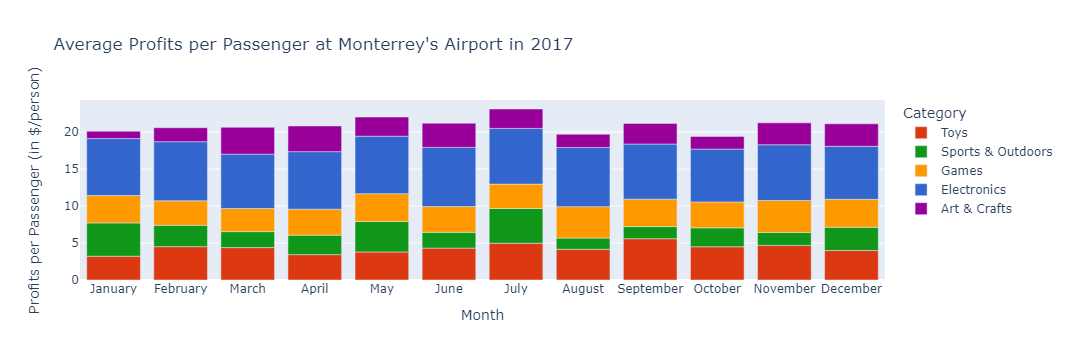

In [229]:
# Let's plot the Profits/Passenger with a bar chart
profits_passenger_monterrey_2017_bar = px.bar(profits_passenger_monterrey_2017, x = 'Month Sale', y = 'Profits per Passenger',
                                     color = 'Product_Category',
                                     labels= {
                                        'Month Sale': 'Month',
                                        'Profits per Passenger': 'Profits per Passenger (in $/person)',
                                         'Product_Category': 'Category',
                                     },
                                    color_discrete_map=d,
                                    title = "Average Profits per Passenger at Monterrey\'s Airport in 2017")

profits_passenger_monterrey_2017_bar.show()

## Secondly, we obtain data from Monterrey's Airport in 2018

In [231]:
# Firstly, let's merge df_monterrey_airports_2018 with df_products

profits_monterrey_airports_2018 = pd.merge(df_monterrey_airports_2018, df_products, on = 'Product_ID')

# Let's calculate profits for each sale
profits_monterrey_airports_2018['Profits'] = (profits_monterrey_airports_2018['Product_Price'] - profits_monterrey_airports_2018['Product_Cost']) * profits_monterrey_airports_2018['Units']
profits_monterrey_airports_2018.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units              Store_Name  \
0   420917 2018-01-01        33          32      1  Maven Toys Monterrey 3   
1   420946 2018-01-01        33          32      1  Maven Toys Monterrey 3   
2   421017 2018-01-01        33          32      1  Maven Toys Monterrey 3   
3   421063 2018-01-01        33          32      1  Maven Toys Monterrey 3   
4   421195 2018-01-01        33          32      1  Maven Toys Monterrey 3   

  Store_City Store_Location Store_Open_Date  Day Sale Month Sale  Year Sale  \
0  Monterrey        Airport      2013-03-17         1    January       2018   
1  Monterrey        Airport      2013-03-17         1    January       2018   
2  Monterrey        Airport      2013-03-17         1    January       2018   
3  Monterrey        Airport      2013-03-17         1    January       2018   
4  Monterrey        Airport      2013-03-17         1    January       2018   

            Product_Name   Product_Category  Product_Cost  Product_Price  \
0  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
1  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
2  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
3  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
4  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   

   Profits  
0      3.0  
1      3.0  
2      3.0  
3      3.0  
4      3.0

In [232]:
# Let's calculate the Profits/Passenger
profits_monterrey_airports_2018['Profits per Passenger'] = profits_monterrey_airports_2018['Profits'] / profits_monterrey_airports_2018['Units']
profits_monterrey_airports_2018.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units              Store_Name  \
0   420917 2018-01-01        33          32      1  Maven Toys Monterrey 3   
1   420946 2018-01-01        33          32      1  Maven Toys Monterrey 3   
2   421017 2018-01-01        33          32      1  Maven Toys Monterrey 3   
3   421063 2018-01-01        33          32      1  Maven Toys Monterrey 3   
4   421195 2018-01-01        33          32      1  Maven Toys Monterrey 3   

  Store_City Store_Location Store_Open_Date  Day Sale Month Sale  Year Sale  \
0  Monterrey        Airport      2013-03-17         1    January       2018   
1  Monterrey        Airport      2013-03-17         1    January       2018   
2  Monterrey        Airport      2013-03-17         1    January       2018   
3  Monterrey        Airport      2013-03-17         1    January       2018   
4  Monterrey        Airport      2013-03-17         1    January       2018   

            Product_Name   Product_Category  Product_Cost  Product_Price  \
0  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
1  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
2  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
3  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   
4  Supersoaker Water Gun  Sports & Outdoors         11.99          14.99   

   Profits  Profits per Passenger  
0      3.0                    3.0  
1      3.0                    3.0  
2      3.0                    3.0  
3      3.0                    3.0  
4      3.0                    3.0

In [233]:
# Let's group the profits per passenger, by month and category
profits_passenger_monterrey_2018 = profits_monterrey_airports_2018.groupby(['Month Sale', 'Product_Category'])['Profits per Passenger'].mean().reset_index()
profits_passenger_monterrey_2018

# Let's order the months in chronological order
ordered_months = ["January", "February", "March", "April", "May", "June", 
      "July", "August", "September", "October", "November", "December"]

profits_passenger_monterrey_2018['to_sort']= profits_passenger_monterrey_2018['Month Sale'].apply(lambda x:ordered_months.index(x))
profits_passenger_monterrey_2018.sort_values(['to_sort'], inplace = True)

profits_passenger_monterrey_2018.head(5)

Month Sale   Product_Category  Profits per Passenger  to_sort
19    January               Toys               4.125581        0
18    January  Sports & Outdoors               2.380435        0
17    January              Games               3.911017        0
16    January        Electronics               7.261538        0
15    January       Art & Crafts               2.974490        0

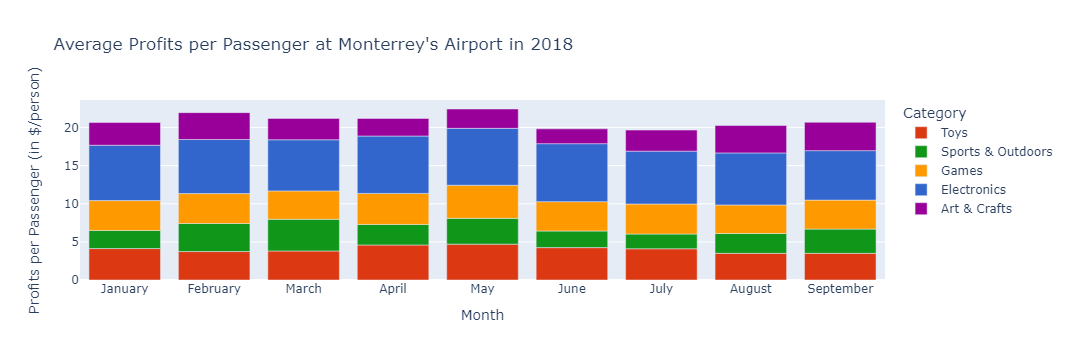

In [234]:
# Let's plot the Profits/Passenger with a bar chart
profits_passenger_monterrey_2018_bar = px.bar(profits_passenger_monterrey_2018, x = 'Month Sale', y = 'Profits per Passenger',
                                     color = 'Product_Category',
                                     labels= {
                                        'Month Sale': 'Month',
                                        'Profits per Passenger': 'Profits per Passenger (in $/person)',
                                         'Product_Category': 'Category',
                                     },
                                    color_discrete_map=d,
                                    title = "Average Profits per Passenger at Monterrey\'s Airport in 2018")

profits_passenger_monterrey_2018_bar.show()

-------

------

------

# Let's work again with data from the stores not including airports from Mexico City, Guadalajara and Monterrey

## The original datasets used at the beginning, are here reminded: df_sales_stores_2017 & df_sales_stores_2018

## Firstly, let's perform an analysis concerning stores in 2017

In [241]:
df_sales_stores_2017.shape

(420845, 12)

In [242]:
# Let's exclude data from Mexico City and Guadalajara's airports from the dataset df_sales_stores_2017

df_stores_2017 = df_sales_stores_2017.loc[~((df_sales_stores_2017['Store_City'].isin(['Ciudad de Mexico', 'Guadalajara', 'Monterrey'])) & (df_sales_stores_2017['Store_Location'] == 'Airport'))]

df_stores_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
0        1 2017-01-01        24           4      1   
1       66 2017-01-01        24           4      1   
2       98 2017-01-01        24           4      1   
3      106 2017-01-01        24          31      1   
4      123 2017-01-01        24          31      1   

                    Store_Name      Store_City Store_Location Store_Open_Date  \
0  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
1  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
2  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
3  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
4  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   

   Day Sale Month Sale  Year Sale  
0         1    January       2017  
1         1    January       2017  
2         1    January       2017  
3         1    January       2017  
4         1    January       2017

In [243]:
# Let's merge df_stores_2017 with df_products on 'Product_Id'

df_products_stores_2017 = pd.merge(df_stores_2017, df_products, on = 'Product_ID', how = 'left')
df_products_stores_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
0        1 2017-01-01        24           4      1   
1       66 2017-01-01        24           4      1   
2       98 2017-01-01        24           4      1   
3      106 2017-01-01        24          31      1   
4      123 2017-01-01        24          31      1   

                    Store_Name      Store_City Store_Location Store_Open_Date  \
0  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
1  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
2  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
3  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
4  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   

   Day Sale Month Sale  Year Sale      Product_Name   Product_Category  \
0         1    January       2017  Chutes & Ladders              Games   
1         1    January       2017  Chutes & Ladders              Games   
2         1    January       2017  Chutes & Ladders              Games   
3         1    January       2017      Splash Balls  Sports & Outdoors   
4         1    January       2017      Splash Balls  Sports & Outdoors   

   Product_Cost  Product_Price  
0          9.99          12.99  
1          9.99          12.99  
2          9.99          12.99  
3          7.99           8.99  
4          7.99           8.99

In [244]:
# Let's calculate profits for each sale

df_products_stores_2017['Profits'] = (df_products_stores_2017['Product_Price'] - df_products_stores_2017['Product_Cost']) * df_products_stores_2017['Units']
df_products_stores_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
0        1 2017-01-01        24           4      1   
1       66 2017-01-01        24           4      1   
2       98 2017-01-01        24           4      1   
3      106 2017-01-01        24          31      1   
4      123 2017-01-01        24          31      1   

                    Store_Name      Store_City Store_Location Store_Open_Date  \
0  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
1  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
2  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
3  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
4  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   

   Day Sale Month Sale  Year Sale      Product_Name   Product_Category  \
0         1    January       2017  Chutes & Ladders              Games   
1         1    January       2017  Chutes & Ladders              Games   
2         1    January       2017  Chutes & Ladders              Games   
3         1    January       2017      Splash Balls  Sports & Outdoors   
4         1    January       2017      Splash Balls  Sports & Outdoors   

   Product_Cost  Product_Price  Profits  
0          9.99          12.99      3.0  
1          9.99          12.99      3.0  
2          9.99          12.99      3.0  
3          7.99           8.99      1.0  
4          7.99           8.99      1.0

In [245]:
# Let's determine how many different cities the dataset "df_products_stores_2017" contains

number_cities = len(df_products_stores_2017['Store_City'].unique())
number_cities

29

# From now, let's perform an analysis for sales according to stores and their respective cities and also an anlysis on categories that sell the most

## Let's analyze sales per city in 2017

In [248]:
df_sales_city = df_products_stores_2017.groupby(['Store_City', 'Store_Location'])['Profits'].sum().reset_index()
df_sales_city.sort_values('Profits', ascending = False, inplace = True)
df_sales_city.head(10)

Store_City Store_Location  Profits
9   Ciudad de Mexico       Downtown  60855.0
25          Mexicali     Commercial  59637.0
15       Guadalajara       Downtown  59381.0
28         Monterrey       Downtown  57069.0
20        Hermosillo     Commercial  54765.0
41            Toluca       Downtown  54365.0
30           Morelia       Downtown  53667.0
8   Ciudad de Mexico     Commercial  51896.0
37          Saltillo       Downtown  51694.0
2           Campeche       Downtown  51171.0

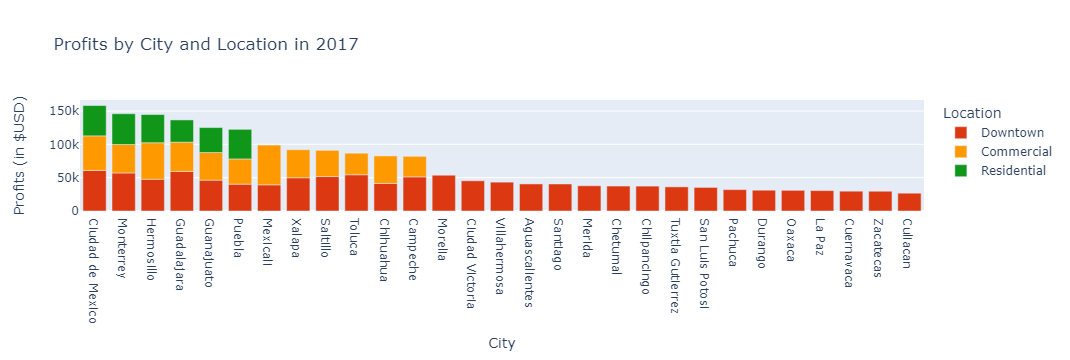

In [249]:
# Map 'Store_Location' to a color
c = dict(zip(top_selling_stores['Store_Location'].unique(), px.colors.qualitative.G10))

# Let's plot in a bar chart, the profits per City and Location

sales_city_bar = px.bar(df_sales_city, x = 'Store_City', y = 'Profits', color = 'Store_Location',
                       labels = {
                           'Store_City': 'City',
                           'Profits': 'Profits (in $USD)',
                           'Store_Location': 'Location'
                       },
                        color_discrete_map=c,
                        title = 'Profits by City and Location in 2017'
                       ).update_xaxes(categoryorder='total descending')
sales_city_bar.show()

## Let's visualize Profits with date for Top 6 Stores

In [251]:
df_products_stores_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
0        1 2017-01-01        24           4      1   
1       66 2017-01-01        24           4      1   
2       98 2017-01-01        24           4      1   
3      106 2017-01-01        24          31      1   
4      123 2017-01-01        24          31      1   

                    Store_Name      Store_City Store_Location Store_Open_Date  \
0  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
1  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
2  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
3  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
4  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   

   Day Sale Month Sale  Year Sale      Product_Name   Product_Category  \
0         1    January       2017  Chutes & Ladders              Games   
1         1    January       2017  Chutes & Ladders              Games   
2         1    January       2017  Chutes & Ladders              Games   
3         1    January       2017      Splash Balls  Sports & Outdoors   
4         1    January       2017      Splash Balls  Sports & Outdoors   

   Product_Cost  Product_Price  Profits  
0          9.99          12.99      3.0  
1          9.99          12.99      3.0  
2          9.99          12.99      3.0  
3          7.99           8.99      1.0  
4          7.99           8.99      1.0

## Let's create 6 datasets including only sales for Top 6 Stores plotted at the previous bar chart

In [253]:
## Mexico City ##
df_mexico_store_2017 = df_products_stores_2017[df_products_stores_2017['Store_City'] == 'Ciudad de Mexico']
df_mexico_store_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
88487       13 2017-01-01        37           8      2   
88488       60 2017-01-01        37          18      1   
88489       70 2017-01-01        37          31      1   
88490       94 2017-01-01        37          22      1   
88491      147 2017-01-01        37          34      1   

                          Store_Name        Store_City Store_Location  \
88487  Maven Toys Ciudad de Mexico 3  Ciudad de Mexico    Residential   
88488  Maven Toys Ciudad de Mexico 3  Ciudad de Mexico    Residential   
88489  Maven Toys Ciudad de Mexico 3  Ciudad de Mexico    Residential   
88490  Maven Toys Ciudad de Mexico 3  Ciudad de Mexico    Residential   
88491  Maven Toys Ciudad de Mexico 3  Ciudad de Mexico    Residential   

      Store_Open_Date  Day Sale Month Sale  Year Sale   Product_Name  \
88487      2013-11-28         1    January       2017  Deck Of Cards   
88488      2013-11-28         1    January       2017    Lego Bricks   
88489      2013-11-28         1    January       2017   Splash Balls   
88490      2013-11-28         1    January       2017       Monopoly   
88491      2013-11-28         1    January       2017      Toy Robot   

        Product_Category  Product_Cost  Product_Price  Profits  
88487              Games          3.99           6.99      6.0  
88488               Toys         34.99          39.99      5.0  
88489  Sports & Outdoors          7.99           8.99      1.0  
88490              Games         13.99          19.99      6.0  
88491        Electronics         20.99          25.99      5.0

In [254]:
profits_mexico_stores_2017 = df_mexico_store_2017.groupby(['Date'])['Profits'].sum().reset_index()
profits_mexico_stores_2017

Date  Profits
0   2017-01-01    357.0
1   2017-01-02    223.0
2   2017-01-03     69.0
3   2017-01-04    191.0
4   2017-01-05    398.0
..         ...      ...
359 2017-12-27     79.0
360 2017-12-28    187.0
361 2017-12-29    406.0
362 2017-12-30    737.0
363 2017-12-31    691.0

[364 rows x 2 columns]

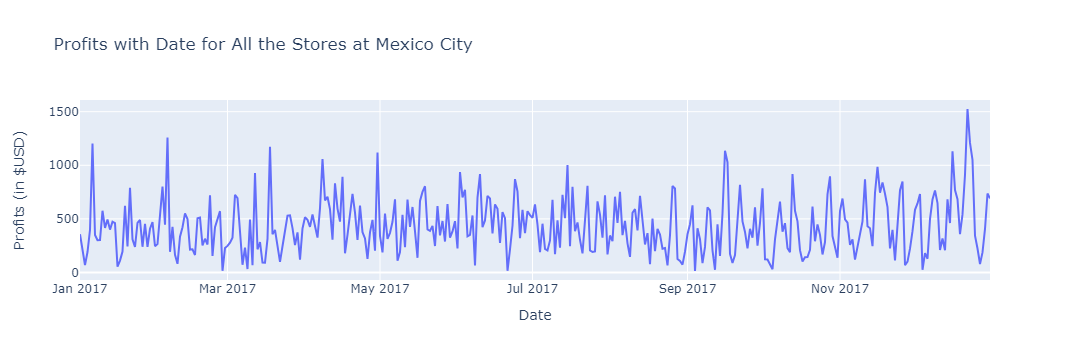

In [255]:
# Let's plot Profits with Date at Mexico City

# Map 'Store_Location' to a color
#e = dict(zip(top_selling_stores['Store_Location'].unique(), px.colors.qualitative.Alphabet))

line_profits_mexico_stores_2017 = px.line(profits_mexico_stores_2017, x = 'Date', y = 'Profits',
                            labels = {
                                'Date': 'Date',
                                'Profits': 'Profits (in $USD)'
                            },
                            #color_discrete_map=e,
                            title = 'Profits with Date for All the Stores at Mexico City'
                           )

line_profits_mexico_stores_2017.show()

In [256]:
## Monterrey ##
df_monterrey_stores_2017 = df_products_stores_2017[df_products_stores_2017['Store_City'] == 'Monterrey']
df_monterrey_stores_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
237096       79 2017-01-01         7           9      1   
237097       80 2017-01-01         7           4      1   
237098       81 2017-01-01         7           9      1   
237099       92 2017-01-01         7           9      1   
237100      125 2017-01-01         7          31      1   

                    Store_Name Store_City Store_Location Store_Open_Date  \
237096  Maven Toys Monterrey 2  Monterrey       Downtown      2003-12-25   
237097  Maven Toys Monterrey 2  Monterrey       Downtown      2003-12-25   
237098  Maven Toys Monterrey 2  Monterrey       Downtown      2003-12-25   
237099  Maven Toys Monterrey 2  Monterrey       Downtown      2003-12-25   
237100  Maven Toys Monterrey 2  Monterrey       Downtown      2003-12-25   

        Day Sale Month Sale  Year Sale      Product_Name   Product_Category  \
237096         1    January       2017          Dino Egg               Toys   
237097         1    January       2017  Chutes & Ladders              Games   
237098         1    January       2017          Dino Egg               Toys   
237099         1    January       2017          Dino Egg               Toys   
237100         1    January       2017      Splash Balls  Sports & Outdoors   

        Product_Cost  Product_Price  Profits  
237096          9.99          10.99      1.0  
237097          9.99          12.99      3.0  
237098          9.99          10.99      1.0  
237099          9.99          10.99      1.0  
237100          7.99           8.99      1.0

In [257]:
profits_monterrey_stores_2017 = df_monterrey_stores_2017.groupby(['Date'])['Profits'].sum().reset_index()
profits_monterrey_stores_2017

Date  Profits
0   2017-01-01    109.0
1   2017-01-02     64.0
2   2017-01-03    350.0
3   2017-01-04    405.0
4   2017-01-05    405.0
..         ...      ...
360 2017-12-27    641.0
361 2017-12-28    429.0
362 2017-12-29    270.0
363 2017-12-30    117.0
364 2017-12-31    731.0

[365 rows x 2 columns]

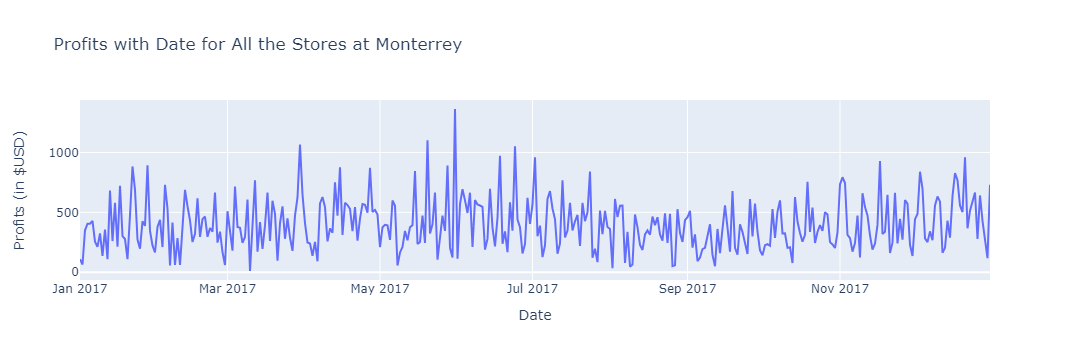

In [258]:
# Let's plot Profits with Date at Monterrey

# Map 'Store_Location' to a color
#e = dict(zip(top_selling_stores['Store_Location'].unique(), px.colors.qualitative.Alphabet))

line_profits_monterrey_stores_2017 = px.line(profits_monterrey_stores_2017, x = 'Date', y = 'Profits',
                            labels = {
                                'Date': 'Date',
                                'Profits': 'Profits (in $USD)'
                            },
                            #color_discrete_map=e,
                            title = 'Profits with Date for All the Stores at Monterrey'
                           )

line_profits_monterrey_stores_2017.show()

In [259]:
## Hermosillo ##
df_hermosillo_stores_2017 = df_products_stores_2017[df_products_stores_2017['Store_City'] == 'Hermosillo']
df_hermosillo_stores_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
129905       26 2017-01-01        41           8      1   
129906       45 2017-01-01        41           8      3   
129907       56 2017-01-01        41           8      2   
129908       59 2017-01-01        41           1      1   
129909       78 2017-01-01        41           8      3   

                     Store_Name  Store_City Store_Location Store_Open_Date  \
129905  Maven Toys Hermosillo 2  Hermosillo       Downtown      2014-06-01   
129906  Maven Toys Hermosillo 2  Hermosillo       Downtown      2014-06-01   
129907  Maven Toys Hermosillo 2  Hermosillo       Downtown      2014-06-01   
129908  Maven Toys Hermosillo 2  Hermosillo       Downtown      2014-06-01   
129909  Maven Toys Hermosillo 2  Hermosillo       Downtown      2014-06-01   

        Day Sale Month Sale  Year Sale   Product_Name Product_Category  \
129905         1    January       2017  Deck Of Cards            Games   
129906         1    January       2017  Deck Of Cards            Games   
129907         1    January       2017  Deck Of Cards            Games   
129908         1    January       2017  Action Figure             Toys   
129909         1    January       2017  Deck Of Cards            Games   

        Product_Cost  Product_Price  Profits  
129905          3.99           6.99      3.0  
129906          3.99           6.99      9.0  
129907          3.99           6.99      6.0  
129908          9.99          15.99      6.0  
129909          3.99           6.99      9.0

In [260]:
profits_hermosillo_stores_2017 = df_hermosillo_stores_2017.groupby(['Date'])['Profits'].sum().reset_index()
profits_hermosillo_stores_2017

Date  Profits
0   2017-01-01    487.0
1   2017-01-02    241.0
2   2017-01-03    138.0
3   2017-01-04    237.0
4   2017-01-05    648.0
..         ...      ...
360 2017-12-27    575.0
361 2017-12-28    341.0
362 2017-12-29   1072.0
363 2017-12-30    295.0
364 2017-12-31    495.0

[365 rows x 2 columns]

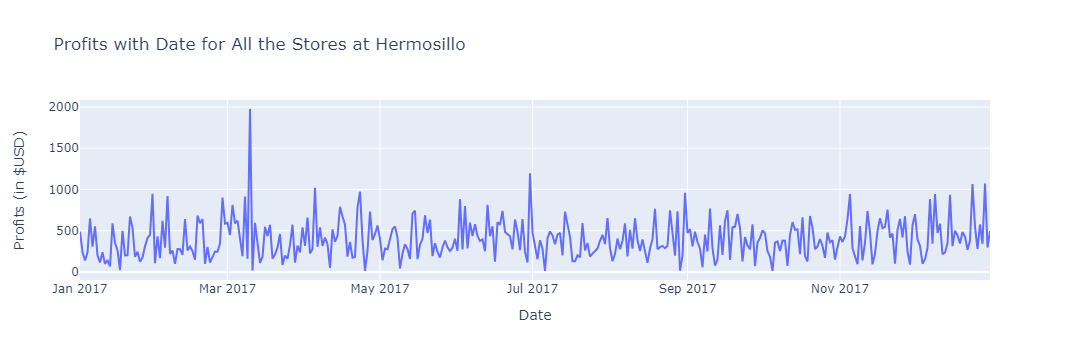

In [261]:
# Let's plot Profits with Date at Hermosillo

# Map 'Store_Location' to a color
#e = dict(zip(top_selling_stores['Store_Location'].unique(), px.colors.qualitative.Alphabet))

line_profits_hermosillo_stores_2017 = px.line(profits_hermosillo_stores_2017, x = 'Date', y = 'Profits',
                            labels = {
                                'Date': 'Date',
                                'Profits': 'Profits (in $USD)'
                            },
                            #color_discrete_map=e,
                            title = 'Profits with Date for All the Stores at Hermosillo'
                           )

line_profits_hermosillo_stores_2017.show()

In [262]:
## Guadalajara ##
df_guadalajara_stores_2017 = df_products_stores_2017[df_products_stores_2017['Store_City'] == 'Guadalajara']
df_guadalajara_stores_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
41379        6 2017-01-01         1          31      1   
41380       87 2017-01-01         1          31      1   
41381      141 2017-01-01         1          21      2   
41382      200 2017-01-01         1          21      2   
41383      231 2017-01-01         1          21      2   

                     Store_Name   Store_City Store_Location Store_Open_Date  \
41379  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18   
41380  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18   
41381  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18   
41382  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18   
41383  Maven Toys Guadalajara 1  Guadalajara    Residential      1992-09-18   

       Day Sale Month Sale  Year Sale        Product_Name   Product_Category  \
41379         1    January       2017        Splash Balls  Sports & Outdoors   
41380         1    January       2017        Splash Balls  Sports & Outdoors   
41381         1    January       2017  Mini Ping Pong Set  Sports & Outdoors   
41382         1    January       2017  Mini Ping Pong Set  Sports & Outdoors   
41383         1    January       2017  Mini Ping Pong Set  Sports & Outdoors   

       Product_Cost  Product_Price  Profits  
41379          7.99           8.99      1.0  
41380          7.99           8.99      1.0  
41381          6.99           9.99      6.0  
41382          6.99           9.99      6.0  
41383          6.99           9.99      6.0

In [263]:
profits_guadalajara_stores_2017 = df_guadalajara_stores_2017.groupby(['Date'])['Profits'].sum().reset_index()
profits_guadalajara_stores_2017

Date  Profits
0   2017-01-01    305.0
1   2017-01-02    867.0
2   2017-01-03    240.0
3   2017-01-04    215.0
4   2017-01-05    179.0
..         ...      ...
360 2017-12-27    305.0
361 2017-12-28    102.0
362 2017-12-29    237.0
363 2017-12-30    333.0
364 2017-12-31    565.0

[365 rows x 2 columns]

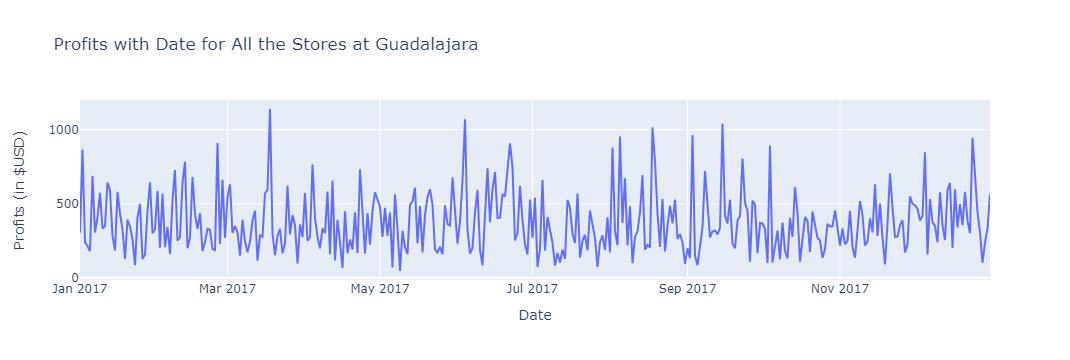

In [264]:
# Let's plot Profits with Date at Guadalajara

# Map 'Store_Location' to a color
#e = dict(zip(top_selling_stores['Store_Location'].unique(), px.colors.qualitative.Alphabet))

line_profits_guadalajara_stores_2017 = px.line(profits_guadalajara_stores_2017, x = 'Date', y = 'Profits',
                            labels = {
                                'Date': 'Date',
                                'Profits': 'Profits (in $USD)'
                            },
                            #color_discrete_map=e,
                            title = 'Profits with Date for All the Stores at Guadalajara'
                           )

line_profits_guadalajara_stores_2017.show()

In [265]:
## Guanajuato ##
df_guanajuato_stores_2017 = df_products_stores_2017[df_products_stores_2017['Store_City'] == 'Guanajuato']
df_guanajuato_stores_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units  \
206858       43 2017-01-01        50           5      1   
206859       49 2017-01-01        50          24      1   
206860       54 2017-01-01        50           6      1   
206861       82 2017-01-01        50          24      1   
206862      111 2017-01-01        50           5      1   

                     Store_Name  Store_City Store_Location Store_Open_Date  \
206858  Maven Toys Guanajuato 3  Guanajuato    Residential      2016-05-18   
206859  Maven Toys Guanajuato 3  Guanajuato    Residential      2016-05-18   
206860  Maven Toys Guanajuato 3  Guanajuato    Residential      2016-05-18   
206861  Maven Toys Guanajuato 3  Guanajuato    Residential      2016-05-18   
206862  Maven Toys Guanajuato 3  Guanajuato    Residential      2016-05-18   

        Day Sale Month Sale  Year Sale      Product_Name   Product_Category  \
206858         1    January       2017  Classic Dominoes              Games   
206859         1    January       2017          Nerf Gun  Sports & Outdoors   
206860         1    January       2017         Colorbuds        Electronics   
206861         1    January       2017          Nerf Gun  Sports & Outdoors   
206862         1    January       2017  Classic Dominoes              Games   

        Product_Cost  Product_Price  Profits  
206858          7.99           9.99      2.0  
206859         14.99          19.99      5.0  
206860          6.99          14.99      8.0  
206861         14.99          19.99      5.0  
206862          7.99           9.99      2.0

In [266]:
profits_guanajuato_stores_2017 = df_guanajuato_stores_2017.groupby(['Date'])['Profits'].sum().reset_index()
profits_guanajuato_stores_2017

Date  Profits
0   2017-01-01    398.0
1   2017-01-02    487.0
2   2017-01-03    231.0
3   2017-01-04    139.0
4   2017-01-05    315.0
..         ...      ...
359 2017-12-27    432.0
360 2017-12-28    470.0
361 2017-12-29    486.0
362 2017-12-30    660.0
363 2017-12-31    985.0

[364 rows x 2 columns]

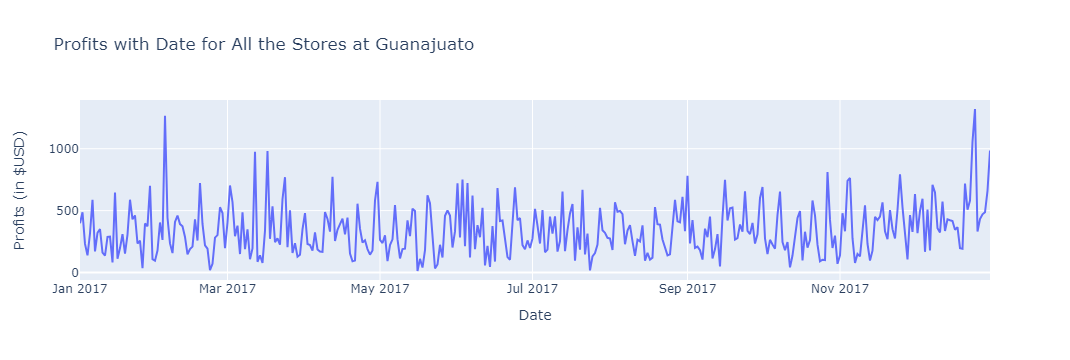

In [267]:
# Let's plot Profits with Date at Guanajuato

# Map 'Store_Location' to a color
#e = dict(zip(top_selling_stores['Store_Location'].unique(), px.colors.qualitative.Alphabet))

line_profits_guanajuato_stores_2017 = px.line(profits_guanajuato_stores_2017, x = 'Date', y = 'Profits',
                            labels = {
                                'Date': 'Date',
                                'Profits': 'Profits (in $USD)'
                            },
                            #color_discrete_map=e,
                            title = 'Profits with Date for All the Stores at Guanajuato'
                           )

line_profits_guanajuato_stores_2017.show()

In [268]:
## Puebla ##
df_puebla_stores_2017 = df_products_stores_2017[df_products_stores_2017['Store_City'] == 'Puebla']
df_puebla_stores_2017.head(5)

Sale_ID       Date  Store_ID  Product_ID  Units           Store_Name  \
7881        2 2017-01-01        28           1      1  Maven Toys Puebla 2   
7882      171 2017-01-01        28           1      1  Maven Toys Puebla 2   
7883      177 2017-01-01        28          30      1  Maven Toys Puebla 2   
7884      210 2017-01-01        28          30      1  Maven Toys Puebla 2   
7885      269 2017-01-01        28          30      1  Maven Toys Puebla 2   

     Store_City Store_Location Store_Open_Date  Day Sale Month Sale  \
7881     Puebla       Downtown      2011-04-01         1    January   
7882     Puebla       Downtown      2011-04-01         1    January   
7883     Puebla       Downtown      2011-04-01         1    January   
7884     Puebla       Downtown      2011-04-01         1    January   
7885     Puebla       Downtown      2011-04-01         1    January   

      Year Sale   Product_Name Product_Category  Product_Cost  Product_Price  \
7881       2017  Action Figure             Toys          9.99          15.99   
7882       2017  Action Figure             Toys          9.99          15.99   
7883       2017   Rubik's Cube            Games         17.99          19.99   
7884       2017   Rubik's Cube            Games         17.99          19.99   
7885       2017   Rubik's Cube            Games         17.99          19.99   

      Profits  
7881      6.0  
7882      6.0  
7883      2.0  
7884      2.0  
7885      2.0

In [269]:
profits_puebla_stores_2017 = df_puebla_stores_2017.groupby(['Date'])['Profits'].sum().reset_index()
profits_puebla_stores_2017

Date  Profits
0   2017-01-01    533.0
1   2017-01-02    508.0
2   2017-01-03     56.0
3   2017-01-04    289.0
4   2017-01-05    311.0
..         ...      ...
360 2017-12-27    644.0
361 2017-12-28    244.0
362 2017-12-29    316.0
363 2017-12-30    358.0
364 2017-12-31    412.0

[365 rows x 2 columns]

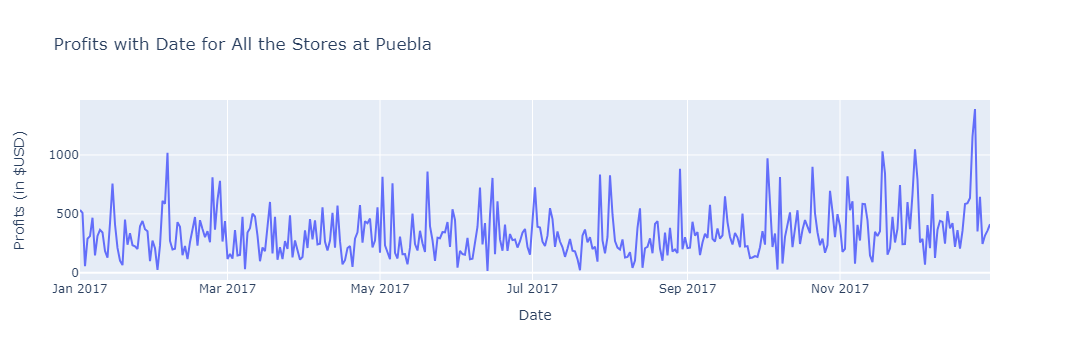

In [270]:
# Let's plot Profits with Date at Puebla

# Map 'Store_Location' to a color
#e = dict(zip(top_selling_stores['Store_Location'].unique(), px.colors.qualitative.Alphabet))

line_profits_puebla_stores_2017 = px.line(profits_puebla_stores_2017, x = 'Date', y = 'Profits',
                            labels = {
                                'Date': 'Date',
                                'Profits': 'Profits (in $USD)'
                            },
                            #color_discrete_map=e,
                            title = 'Profits with Date for All the Stores at Puebla'
                           )

line_profits_puebla_stores_2017.show()

In [271]:
#'Mexicali', 'Xalapa', 'Saltillo', 'Toluca', 'Chihuahua', 'Campeche'